In [4]:
import scanpy as sc
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150,facecolor='white')

from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding

/Users/ceglian/miniforge3/envs/scrna/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ceglian/miniforge3/envs/scrna/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ceglian/miniforge3/envs/scrna/lib/python3.9/site-packages/uma

scanpy==1.9.5 anndata==0.10.3 umap==0.5.3 numpy==1.26.1 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.10


/Users/ceglian/miniforge3/envs/scrna/lib/python3.9/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [5]:
adata = sc.read("PBMC.h5ad")

/Users/ceglian/miniforge3/envs/scrna/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [10]:
#any without signed mi were  false
signed_mi          = False
init_ortho         = False
entropy_threshold  = 1
mutual_information = "pbmc_{}_{}_{}.p".format(init_ortho,signed_mi,str(entropy_threshold).replace(".",""))
adata_h5ad         = "PBMC.h5ad"
embedding_size     = 100
alpha              = 0.00
beta               = 0.00
gain               = 100
vector_file        = "embeddings/pbmc_{}_{}_{}_{}_{}_{}.vec".format(embedding_size, alpha, beta, gain, signed_mi, init_ortho)
retrain            = True
device             = "cpu"

# Process Data

In [7]:
dataset = GeneVectorDataset(adata,load_expression=retrain,signed_mi=signed_mi,device=device)

/Users/ceglian/GitHub/genevector/genevector/data.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type(context.metadata[column][0]) == bytes:


Running...
Loading Expression.
Indexing expression.


100%|██████████| 1051348/1051348 [00:00<00:00, 1775434.43it/s]


Finished.


# Setup Model

In [14]:
# if retrain:
#     # compute_mi = False
#     # cmps = GeneVector(dataset,
#     #                     output_file=vector_file,
#     #                     emb_dimension=embedding_size,
#     #                     gain=gain,
#     #                     compute_mi=compute_mi,
#     #                     init_ortho=init_ortho,
#     #                     device=device)
for x in range(2000):
    cmps.train(2000,threshold=0)
    embed = GeneEmbedding(vector_file, dataset, vector="average")
    print(embed.compute_similarities("IFIT1")[:10])
# else:
#     embed = GeneEmbedding(vector_file, dataset, vector="average")

**** Epoch 21340 	Loss: 5.55253
**** Epoch 21360 	Loss: 5.55268
**** Epoch 21380 	Loss: 5.55245
**** Epoch 21400 	Loss: 5.55335
**** Epoch 21420 	Loss: 5.55147
**** Epoch 21440 	Loss: 5.55342
**** Epoch 21460 	Loss: 5.5525
**** Epoch 21480 	Loss: 5.55304
**** Epoch 21500 	Loss: 5.55294
**** Epoch 21520 	Loss: 5.55291
**** Epoch 21540 	Loss: 5.55144
**** Epoch 21560 	Loss: 5.55323
**** Epoch 21580 	Loss: 5.55115
**** Epoch 21600 	Loss: 5.552
**** Epoch 21620 	Loss: 5.55248
**** Epoch 21640 	Loss: 5.55287
**** Epoch 21660 	Loss: 5.55467
**** Epoch 21680 	Loss: 5.55192
**** Epoch 21700 	Loss: 5.55229
**** Epoch 21720 	Loss: 5.55158
**** Epoch 21740 	Loss: 5.55259
**** Epoch 21760 	Loss: 5.55365
**** Epoch 21780 	Loss: 5.55307
**** Epoch 21800 	Loss: 5.5533
**** Epoch 21820 	Loss: 5.55243
**** Epoch 21840 	Loss: 5.55268
**** Epoch 21860 	Loss: 5.55262
**** Epoch 21880 	Loss: 5.55212
**** Epoch 21900 	Loss: 5.55287
**** Epoch 21920 	Loss: 5.55192
**** Epoch 21940 	Loss: 5.55321
**** Epoch 2

100%|██████████| 1000/1000 [00:00<00:00, 3390706.55it/s]


        Gene  Similarity
0      IFIT1    1.000000
1  ITPKB-AS1    0.666364
2     ZNF700    0.543423
3     SH3BGR    0.376257
4     TPSAB1    0.367173
5      AURKB    0.362217
6  LINC00893    0.358972
7     PAXIP1    0.347572
8       TFPI    0.342346
9      MYCT1    0.328303
**** Epoch 23340 	Loss: 5.55168
**** Epoch 23360 	Loss: 5.55211
**** Epoch 23380 	Loss: 5.55189
**** Epoch 23400 	Loss: 5.55209
**** Epoch 23420 	Loss: 5.55202
**** Epoch 23440 	Loss: 5.55273
**** Epoch 23460 	Loss: 5.55284
**** Epoch 23480 	Loss: 5.55192
**** Epoch 23500 	Loss: 5.55326
**** Epoch 23520 	Loss: 5.55389
**** Epoch 23540 	Loss: 5.55397
**** Epoch 23560 	Loss: 5.55388
**** Epoch 23580 	Loss: 5.55151
**** Epoch 23600 	Loss: 5.55178
**** Epoch 23620 	Loss: 5.55153
**** Epoch 23640 	Loss: 5.55219
**** Epoch 23660 	Loss: 5.5515
**** Epoch 23680 	Loss: 5.55233
**** Epoch 23700 	Loss: 5.55167
**** Epoch 23720 	Loss: 5.55292
**** Epoch 23740 	Loss: 5.55167
**** Epoch 23760 	Loss: 5.55225
**** Epoch 23780 	Loss

100%|██████████| 1000/1000 [00:00<00:00, 3862158.38it/s]


           Gene  Similarity
0         IFIT1    1.000000
1         PARM1    0.512331
2        ZNF529    0.392709
3     ITPKB-AS1    0.358668
4        SOWAHD    0.318520
5  RP11-328M4.2    0.292930
6         ZNF80    0.289373
7           GEM    0.258854
8        HS3ST1    0.258608
9        PAXIP1    0.250764
**** Epoch 25340 	Loss: 5.55174
**** Epoch 25360 	Loss: 5.55139
**** Epoch 25380 	Loss: 5.55198
**** Epoch 25400 	Loss: 5.55343
**** Epoch 25420 	Loss: 5.55254
**** Epoch 25440 	Loss: 5.55206
**** Epoch 25460 	Loss: 5.55221
**** Epoch 25480 	Loss: 5.5529
**** Epoch 25500 	Loss: 5.55241
**** Epoch 25520 	Loss: 5.55237
**** Epoch 25540 	Loss: 5.55253
**** Epoch 25560 	Loss: 5.55106
**** Epoch 25580 	Loss: 5.55179
**** Epoch 25600 	Loss: 5.5516
**** Epoch 25620 	Loss: 5.55242
**** Epoch 25640 	Loss: 5.55212
**** Epoch 25660 	Loss: 5.55271
**** Epoch 25680 	Loss: 5.55167
**** Epoch 25700 	Loss: 5.55172
**** Epoch 25720 	Loss: 5.55139
**** Epoch 25740 	Loss: 5.5522
**** Epoch 25760 	Loss:

100%|██████████| 1000/1000 [00:00<00:00, 3675989.48it/s]

        Gene  Similarity
0      IFIT1    1.000000
1      ERMAP    0.810765
2    METTL25    0.506662
3  ITPKB-AS1    0.296693
4      AURKB    0.294849
5      EFNA5    0.266048
6     TPSAB1    0.260119
7      PARM1    0.254168
8      PANK3    0.239448
9   SELENBP1    0.235703


**** Epoch 27340 	Loss: 5.5531
**** Epoch 27360 	Loss: 5.55193
**** Epoch 27380 	Loss: 5.55128
**** Epoch 27400 	Loss: 5.55177
**** Epoch 27420 	Loss: 5.55143
**** Epoch 27440 	Loss: 5.5529
**** Epoch 27460 	Loss: 5.55143
**** Epoch 27480 	Loss: 5.55193
**** Epoch 27500 	Loss: 5.55091
**** Epoch 27520 	Loss: 5.55221
**** Epoch 27540 	Loss: 5.55181
**** Epoch 27560 	Loss: 5.55212
**** Epoch 27580 	Loss: 5.55187
**** Epoch 27600 	Loss: 5.55208
**** Epoch 27620 	Loss: 5.55159
**** Epoch 27640 	Loss: 5.55202
**** Epoch 27660 	Loss: 5.55228
**** Epoch 27680 	Loss: 5.55211
**** Epoch 27700 	Loss: 5.55174
**** Epoch 27720 	Loss: 5.55198
**** Epoch 27740 	Loss: 5.55122
**** Epoch 27760 	Loss: 5.55256
**** Epoch 27780 	Loss: 5.55286
**** Epoch 27800 	Loss: 5.55181
**** Epoch 27820 	Loss: 5.5515
**** Epoch 27840 	Loss: 5.55284
**** Epoch 27860 	Loss: 5.55177
**** Epoch 27880 	Loss: 5.55151
**** Epoch 27900 	Loss: 5.55257
**** Epoch 27920 	Loss: 5.55228
**** Epoch 27940 	Loss: 5.55221
**** Epoch

100%|██████████| 1000/1000 [00:00<00:00, 3637731.14it/s]


            Gene  Similarity
0          IFIT1    1.000000
1         AGPAT9    0.871510
2  RP3-508I15.14    0.387491
3   RP11-73E17.2    0.384005
4         DHRS11    0.362524
5         SH3BGR    0.361367
6         SOWAHD    0.338980
7          WNT7A    0.329371
8         PAXIP1    0.317462
9         FIGNL1    0.310451
**** Epoch 29340 	Loss: 5.55109
**** Epoch 29360 	Loss: 5.55146
**** Epoch 29380 	Loss: 5.5516
**** Epoch 29400 	Loss: 5.55308
**** Epoch 29420 	Loss: 5.55205
**** Epoch 29440 	Loss: 5.55174
**** Epoch 29460 	Loss: 5.55054
**** Epoch 29480 	Loss: 5.55097
**** Epoch 29500 	Loss: 5.5524
**** Epoch 29520 	Loss: 5.55199
**** Epoch 29540 	Loss: 5.55167
**** Epoch 29560 	Loss: 5.55129
**** Epoch 29580 	Loss: 5.55164
**** Epoch 29600 	Loss: 5.55239
**** Epoch 29620 	Loss: 5.55184
**** Epoch 29640 	Loss: 5.55243
**** Epoch 29660 	Loss: 5.55254
**** Epoch 29680 	Loss: 5.552
**** Epoch 29700 	Loss: 5.55226
**** Epoch 29720 	Loss: 5.55243
**** Epoch 29740 	Loss: 5.55115
**** Epoch 29

100%|██████████| 1000/1000 [00:00<00:00, 3612664.94it/s]

            Gene  Similarity
0          IFIT1    1.000000
1         ZNF669    0.895857
2          WNT7A    0.577669
3           KLK1    0.374269
4        SLC16A7    0.363260
5         PRSS57    0.357742
6        PRELID2    0.338506
7  RP3-508I15.14    0.316776
8       CCDC102B    0.312052
9          ERMP1    0.305525


**** Epoch 31340 	Loss: 5.55247
**** Epoch 31360 	Loss: 5.55185
**** Epoch 31380 	Loss: 5.5505
**** Epoch 31400 	Loss: 5.55201
**** Epoch 31420 	Loss: 5.55294
**** Epoch 31440 	Loss: 5.55091
**** Epoch 31460 	Loss: 5.55164
**** Epoch 31480 	Loss: 5.55131
**** Epoch 31500 	Loss: 5.55242
**** Epoch 31520 	Loss: 5.55267
**** Epoch 31540 	Loss: 5.55299
**** Epoch 31560 	Loss: 5.55159
**** Epoch 31580 	Loss: 5.55268
**** Epoch 31600 	Loss: 5.55243
**** Epoch 31620 	Loss: 5.55092
**** Epoch 31640 	Loss: 5.55135
**** Epoch 31660 	Loss: 5.55176
**** Epoch 31680 	Loss: 5.55187
**** Epoch 31700 	Loss: 5.55222
**** Epoch 31720 	Loss: 5.55134
**** Epoch 31740 	Loss: 5.55085
**** Epoch 31760 	Loss: 5.55197
**** Epoch 31780 	Loss: 5.55223
**** Epoch 31800 	Loss: 5.55142
**** Epoch 31820 	Loss: 5.5514
**** Epoch 31840 	Loss: 5.55214
**** Epoch 31860 	Loss: 5.55175
**** Epoch 31880 	Loss: 5.55137
**** Epoch 31900 	Loss: 5.55166
**** Epoch 31920 	Loss: 5.55281
**** Epoch 31940 	Loss: 5.55115
**** Epoc

100%|██████████| 1000/1000 [00:00<00:00, 3847985.32it/s]

        Gene  Similarity
0      IFIT1    1.000000
1    L3MBTL3    0.569861
2       SGCE    0.370027
3     DHRS11    0.355176
4      TMPPE    0.321674
5  ITPKB-AS1    0.313632
6      WNT7A    0.312401
7     SH3BGR    0.307865
8       BCL9    0.303788
9       TFPI    0.297416


**** Epoch 33340 	Loss: 5.55172
**** Epoch 33360 	Loss: 5.5509
**** Epoch 33380 	Loss: 5.55089
**** Epoch 33400 	Loss: 5.55193
**** Epoch 33420 	Loss: 5.55038
**** Epoch 33440 	Loss: 5.55299
**** Epoch 33460 	Loss: 5.5519
**** Epoch 33480 	Loss: 5.5531
**** Epoch 33500 	Loss: 5.55302
**** Epoch 33520 	Loss: 5.55116
**** Epoch 33540 	Loss: 5.5515
**** Epoch 33560 	Loss: 5.55162
**** Epoch 33580 	Loss: 5.55178
**** Epoch 33600 	Loss: 5.55139
**** Epoch 33620 	Loss: 5.55213
**** Epoch 33640 	Loss: 5.55236
**** Epoch 33660 	Loss: 5.5511
**** Epoch 33680 	Loss: 5.55102
**** Epoch 33700 	Loss: 5.55132
**** Epoch 33720 	Loss: 5.55308
**** Epoch 33740 	Loss: 5.55227
**** Epoch 33760 	Loss: 5.55248
**** Epoch 33780 	Loss: 5.55184
**** Epoch 33800 	Loss: 5.55253
**** Epoch 33820 	Loss: 5.55172
**** Epoch 33840 	Loss: 5.55263
**** Epoch 33860 	Loss: 5.55266
**** Epoch 33880 	Loss: 5.55179
**** Epoch 33900 	Loss: 5.55156
**** Epoch 33920 	Loss: 5.55087
**** Epoch 33940 	Loss: 5.55195
**** Epoch 33

100%|██████████| 1000/1000 [00:00<00:00, 3731587.19it/s]


           Gene  Similarity
0         IFIT1    1.000000
1         PXDC1    0.524196
2        ZNF664    0.485964
3     ITPKB-AS1    0.420398
4  RP11-489E7.4    0.399377
5          BCL9    0.387992
6        PAXIP1    0.377933
7     SRRM2-AS1    0.353460
8         NIPA1    0.342805
9         ROBO3    0.326281
**** Epoch 35340 	Loss: 5.5519
**** Epoch 35360 	Loss: 5.55112
**** Epoch 35380 	Loss: 5.55213
**** Epoch 35400 	Loss: 5.55107
**** Epoch 35420 	Loss: 5.55035
**** Epoch 35440 	Loss: 5.55085
**** Epoch 35460 	Loss: 5.55254
**** Epoch 35480 	Loss: 5.55203
**** Epoch 35500 	Loss: 5.5508
**** Epoch 35520 	Loss: 5.55287
**** Epoch 35540 	Loss: 5.55124
**** Epoch 35560 	Loss: 5.55026
**** Epoch 35580 	Loss: 5.551
**** Epoch 35600 	Loss: 5.55342
**** Epoch 35620 	Loss: 5.55114
**** Epoch 35640 	Loss: 5.55077
**** Epoch 35660 	Loss: 5.55057
**** Epoch 35680 	Loss: 5.55133
**** Epoch 35700 	Loss: 5.55128
**** Epoch 35720 	Loss: 5.55117
**** Epoch 35740 	Loss: 5.55254
**** Epoch 35760 	Loss: 

100%|██████████| 1000/1000 [00:00<00:00, 3675989.48it/s]

            Gene  Similarity
0          IFIT1    1.000000
1           HMMR    0.878720
2          TNNT1    0.819932
3           SGCE    0.505662
4  RP11-117D22.2    0.402834
5  RP3-508I15.14    0.395876
6       C22ORF42    0.348303
7      ITPKB-AS1    0.340926
8          DERL3    0.338294
9          TPST1    0.331525


**** Epoch 37340 	Loss: 5.55194
**** Epoch 37360 	Loss: 5.55177
**** Epoch 37380 	Loss: 5.55377
**** Epoch 37400 	Loss: 5.55069
**** Epoch 37420 	Loss: 5.55126
**** Epoch 37440 	Loss: 5.5504
**** Epoch 37460 	Loss: 5.55168
**** Epoch 37480 	Loss: 5.5509
**** Epoch 37500 	Loss: 5.55108
**** Epoch 37520 	Loss: 5.551
**** Epoch 37540 	Loss: 5.55176
**** Epoch 37560 	Loss: 5.55117
**** Epoch 37580 	Loss: 5.55221
**** Epoch 37600 	Loss: 5.55018
**** Epoch 37620 	Loss: 5.55092
**** Epoch 37640 	Loss: 5.55137
**** Epoch 37660 	Loss: 5.55168
**** Epoch 37680 	Loss: 5.55225
**** Epoch 37700 	Loss: 5.55137
**** Epoch 37720 	Loss: 5.55059
**** Epoch 37740 	Loss: 5.55066
**** Epoch 37760 	Loss: 5.55069
**** Epoch 37780 	Loss: 5.55093
**** Epoch 37800 	Loss: 5.55163
**** Epoch 37820 	Loss: 5.55112
**** Epoch 37840 	Loss: 5.55201
**** Epoch 37860 	Loss: 5.55112
**** Epoch 37880 	Loss: 5.55207
**** Epoch 37900 	Loss: 5.55078
**** Epoch 37920 	Loss: 5.55118
**** Epoch 37940 	Loss: 5.55131
**** Epoch 3

100%|██████████| 1000/1000 [00:00<00:00, 3204204.74it/s]


       Gene  Similarity
0     IFIT1    1.000000
1     PRR16    0.868915
2     CXCR5    0.706430
3      TFPI    0.557410
4    PAXIP1    0.524858
5    SOWAHD    0.499929
6     TMPPE    0.419435
7  SELENBP1    0.395873
8     MYOM2    0.366496
9     PARM1    0.319573
**** Epoch 39340 	Loss: 5.5507
**** Epoch 39360 	Loss: 5.55027
**** Epoch 39380 	Loss: 5.55289
**** Epoch 39400 	Loss: 5.55067
**** Epoch 39420 	Loss: 5.55143
**** Epoch 39440 	Loss: 5.55083
**** Epoch 39460 	Loss: 5.55447
**** Epoch 39480 	Loss: 5.55141
**** Epoch 39500 	Loss: 5.55181
**** Epoch 39520 	Loss: 5.55267
**** Epoch 39540 	Loss: 5.55203
**** Epoch 39560 	Loss: 5.55115
**** Epoch 39580 	Loss: 5.55232
**** Epoch 39600 	Loss: 5.55202
**** Epoch 39620 	Loss: 5.55097
**** Epoch 39640 	Loss: 5.55117
**** Epoch 39660 	Loss: 5.5512
**** Epoch 39680 	Loss: 5.55102
**** Epoch 39700 	Loss: 5.55118
**** Epoch 39720 	Loss: 5.552
**** Epoch 39740 	Loss: 5.55196
**** Epoch 39760 	Loss: 5.55137
**** Epoch 39780 	Loss: 5.55168
****

100%|██████████| 1000/1000 [00:00<00:00, 3802632.82it/s]

            Gene  Similarity
0          IFIT1    1.000000
1          PARM1    0.727077
2  RP11-472G21.2    0.485306
3            SCT    0.391974
4       PDZK1IP1    0.388587
5       CCDC102B    0.381652
6   RP11-10C24.1    0.344353
7      ITPKB-AS1    0.316026
8        ZSCAN29    0.297434
9   RP11-328M4.2    0.296751


**** Epoch 41340 	Loss: 5.5512
**** Epoch 41360 	Loss: 5.55138
**** Epoch 41380 	Loss: 5.55092
**** Epoch 41400 	Loss: 5.55171
**** Epoch 41420 	Loss: 5.55143
**** Epoch 41440 	Loss: 5.55211
**** Epoch 41460 	Loss: 5.55161
**** Epoch 41480 	Loss: 5.55171
**** Epoch 41500 	Loss: 5.55104
**** Epoch 41520 	Loss: 5.55128
**** Epoch 41540 	Loss: 5.55026
**** Epoch 41560 	Loss: 5.55093
**** Epoch 41580 	Loss: 5.55235
**** Epoch 41600 	Loss: 5.55125
**** Epoch 41620 	Loss: 5.55131
**** Epoch 41640 	Loss: 5.55069
**** Epoch 41660 	Loss: 5.55135
**** Epoch 41680 	Loss: 5.55055
**** Epoch 41700 	Loss: 5.55081
**** Epoch 41720 	Loss: 5.55165
**** Epoch 41740 	Loss: 5.55129
**** Epoch 41760 	Loss: 5.55111
**** Epoch 41780 	Loss: 5.55188
**** Epoch 41800 	Loss: 5.55114
**** Epoch 41820 	Loss: 5.55139
**** Epoch 41840 	Loss: 5.55089
**** Epoch 41860 	Loss: 5.55147
**** Epoch 41880 	Loss: 5.55103
**** Epoch 41900 	Loss: 5.55269
**** Epoch 41920 	Loss: 5.55081
**** Epoch 41940 	Loss: 5.55067
**** Epoc

100%|██████████| 1000/1000 [00:00<00:00, 3775251.13it/s]

           Gene  Similarity
0         IFIT1    1.000000
1         SYNJ1    0.400554
2      CCDC102B    0.332317
3  RP11-73E17.2    0.317543
4     ITPKB-AS1    0.300483
5          BCL9    0.291255
6  RP11-392P7.6    0.290589
7          EGR4    0.289095
8        ZNF669    0.270066
9         TLCD1    0.241182


**** Epoch 43340 	Loss: 5.5515
**** Epoch 43360 	Loss: 5.55298
**** Epoch 43380 	Loss: 5.55256
**** Epoch 43400 	Loss: 5.55264
**** Epoch 43420 	Loss: 5.55065
**** Epoch 43440 	Loss: 5.55049
**** Epoch 43460 	Loss: 5.55044
**** Epoch 43480 	Loss: 5.55163
**** Epoch 43500 	Loss: 5.55025
**** Epoch 43520 	Loss: 5.55146
**** Epoch 43540 	Loss: 5.5495
**** Epoch 43560 	Loss: 5.55018
**** Epoch 43580 	Loss: 5.55024
**** Epoch 43600 	Loss: 5.5513
**** Epoch 43620 	Loss: 5.551
**** Epoch 43640 	Loss: 5.55057
**** Epoch 43660 	Loss: 5.55043
**** Epoch 43680 	Loss: 5.5515
**** Epoch 43700 	Loss: 5.5505
**** Epoch 43720 	Loss: 5.55154
**** Epoch 43740 	Loss: 5.55128
**** Epoch 43760 	Loss: 5.55151
**** Epoch 43780 	Loss: 5.55061
**** Epoch 43800 	Loss: 5.55118
**** Epoch 43820 	Loss: 5.55026
**** Epoch 43840 	Loss: 5.55248
**** Epoch 43860 	Loss: 5.55075
**** Epoch 43880 	Loss: 5.55302
**** Epoch 43900 	Loss: 5.55049
**** Epoch 43920 	Loss: 5.55059
**** Epoch 43940 	Loss: 5.55219
**** Epoch 4396

100%|██████████| 1000/1000 [00:00<00:00, 3862158.38it/s]

        Gene  Similarity
0      IFIT1    1.000000
1      SPON2    0.579881
2    FAM135A    0.519843
3  LINC01004    0.385174
4      ROBO3    0.355267
5     TPSAB1    0.331718
6      MMP19    0.315689
7    SLC16A7    0.313774
8       BCL9    0.306320
9       PIGB    0.300397


**** Epoch 45340 	Loss: 5.55065
**** Epoch 45360 	Loss: 5.55115
**** Epoch 45380 	Loss: 5.5514
**** Epoch 45400 	Loss: 5.55213
**** Epoch 45420 	Loss: 5.55227
**** Epoch 45440 	Loss: 5.55092
**** Epoch 45460 	Loss: 5.55062
**** Epoch 45480 	Loss: 5.55201
**** Epoch 45500 	Loss: 5.55192
**** Epoch 45520 	Loss: 5.55193
**** Epoch 45540 	Loss: 5.5507
**** Epoch 45560 	Loss: 5.55096
**** Epoch 45580 	Loss: 5.5503
**** Epoch 45600 	Loss: 5.55231
**** Epoch 45620 	Loss: 5.55092
**** Epoch 45640 	Loss: 5.55119
**** Epoch 45660 	Loss: 5.55122
**** Epoch 45680 	Loss: 5.55133
**** Epoch 45700 	Loss: 5.55165
**** Epoch 45720 	Loss: 5.55056
**** Epoch 45740 	Loss: 5.55026
**** Epoch 45760 	Loss: 5.55204
**** Epoch 45780 	Loss: 5.5509
**** Epoch 45800 	Loss: 5.55167
**** Epoch 45820 	Loss: 5.5509
**** Epoch 45840 	Loss: 5.55046
**** Epoch 45860 	Loss: 5.55083
**** Epoch 45880 	Loss: 5.5508
**** Epoch 45900 	Loss: 5.55214
**** Epoch 45920 	Loss: 5.55099
**** Epoch 45940 	Loss: 5.5512
**** Epoch 4596

100%|██████████| 1000/1000 [00:00<00:00, 3449263.16it/s]


           Gene  Similarity
0         IFIT1    1.000000
1      SELENBP1    0.591996
2         USP46    0.430158
3         WNT7A    0.397181
4  RP11-553L6.5    0.340457
5          KLF1    0.333297
6  RP11-392P7.6    0.312189
7         APBB2    0.302542
8     ITPKB-AS1    0.254025
9         PARM1    0.239669
**** Epoch 47340 	Loss: 5.55203
**** Epoch 47360 	Loss: 5.55185
**** Epoch 47380 	Loss: 5.55156
**** Epoch 47400 	Loss: 5.55218
**** Epoch 47420 	Loss: 5.55087
**** Epoch 47440 	Loss: 5.55148
**** Epoch 47460 	Loss: 5.55044
**** Epoch 47480 	Loss: 5.55172
**** Epoch 47500 	Loss: 5.55096
**** Epoch 47520 	Loss: 5.55115
**** Epoch 47540 	Loss: 5.55182
**** Epoch 47560 	Loss: 5.55239
**** Epoch 47580 	Loss: 5.55202
**** Epoch 47600 	Loss: 5.54932
**** Epoch 47620 	Loss: 5.5518
**** Epoch 47640 	Loss: 5.55057
**** Epoch 47660 	Loss: 5.55129
**** Epoch 47680 	Loss: 5.55159
**** Epoch 47700 	Loss: 5.55085
**** Epoch 47720 	Loss: 5.55125
**** Epoch 47740 	Loss: 5.5507
**** Epoch 47760 	Loss

100%|██████████| 1000/1000 [00:00<00:00, 3572660.99it/s]

            Gene  Similarity
0          IFIT1    1.000000
1         VPREB3    0.881096
2  RP3-508I15.14    0.623028
3           BCL9    0.576289
4          WNT7A    0.478402
5      ITPKB-AS1    0.434224
6         SOWAHD    0.342003
7        PRKCDBP    0.310132
8  RP11-472G21.2    0.299565
9           KLF1    0.299027


**** Epoch 49340 	Loss: 5.55065
**** Epoch 49360 	Loss: 5.55185
**** Epoch 49380 	Loss: 5.5524
**** Epoch 49400 	Loss: 5.55187
**** Epoch 49420 	Loss: 5.55203
**** Epoch 49440 	Loss: 5.55106
**** Epoch 49460 	Loss: 5.55087
**** Epoch 49480 	Loss: 5.55054
**** Epoch 49500 	Loss: 5.55139
**** Epoch 49520 	Loss: 5.5508
**** Epoch 49540 	Loss: 5.5511
**** Epoch 49560 	Loss: 5.55144
**** Epoch 49580 	Loss: 5.55106
**** Epoch 49600 	Loss: 5.55074
**** Epoch 49620 	Loss: 5.551
**** Epoch 49640 	Loss: 5.55112
**** Epoch 49660 	Loss: 5.54994
**** Epoch 49680 	Loss: 5.55073
**** Epoch 49700 	Loss: 5.55003
**** Epoch 49720 	Loss: 5.55002
**** Epoch 49740 	Loss: 5.55252
**** Epoch 49760 	Loss: 5.55077
**** Epoch 49780 	Loss: 5.55206
**** Epoch 49800 	Loss: 5.55227
**** Epoch 49820 	Loss: 5.55018
**** Epoch 49840 	Loss: 5.55185
**** Epoch 49860 	Loss: 5.55051
**** Epoch 49880 	Loss: 5.55177
**** Epoch 49900 	Loss: 5.55078
**** Epoch 49920 	Loss: 5.55125
**** Epoch 49940 	Loss: 5.55004
**** Epoch 49

100%|██████████| 1000/1000 [00:00<00:00, 3187161.09it/s]


          Gene  Similarity
0        IFIT1    1.000000
1     C22ORF42    0.862266
2         CMIP    0.542773
3         EGR4    0.534706
4        TOP2A    0.498457
5  RP11-35G9.3    0.424987
6        USP46    0.358450
7         BCL9    0.334899
8          TK1    0.316711
9       SH3BGR    0.307261
**** Epoch 51340 	Loss: 5.55023
**** Epoch 51360 	Loss: 5.55163
**** Epoch 51380 	Loss: 5.55159
**** Epoch 51400 	Loss: 5.55116
**** Epoch 51420 	Loss: 5.55122
**** Epoch 51440 	Loss: 5.55187
**** Epoch 51460 	Loss: 5.55055
**** Epoch 51480 	Loss: 5.55086
**** Epoch 51500 	Loss: 5.55117
**** Epoch 51520 	Loss: 5.5514
**** Epoch 51540 	Loss: 5.55075
**** Epoch 51560 	Loss: 5.55222
**** Epoch 51580 	Loss: 5.55099
**** Epoch 51600 	Loss: 5.55164
**** Epoch 51620 	Loss: 5.55116
**** Epoch 51640 	Loss: 5.5517
**** Epoch 51660 	Loss: 5.55072
**** Epoch 51680 	Loss: 5.55234
**** Epoch 51700 	Loss: 5.5516
**** Epoch 51720 	Loss: 5.55006
**** Epoch 51740 	Loss: 5.55033
**** Epoch 51760 	Loss: 5.55213
**

100%|██████████| 1000/1000 [00:00<00:00, 3533533.28it/s]


            Gene  Similarity
0          IFIT1    1.000000
1          WNT7A    0.532361
2   RP11-489E7.4    0.489802
3           SGCE    0.432926
4          KLRC2    0.415623
5         POLR3A    0.297149
6           BCL9    0.290500
7         AKR1C1    0.280073
8          CCNB2    0.278474
9  RP3-508I15.14    0.277315
**** Epoch 53340 	Loss: 5.55073
**** Epoch 53360 	Loss: 5.55133
**** Epoch 53380 	Loss: 5.55142
**** Epoch 53400 	Loss: 5.55031
**** Epoch 53420 	Loss: 5.55131
**** Epoch 53440 	Loss: 5.55088
**** Epoch 53460 	Loss: 5.55094
**** Epoch 53480 	Loss: 5.55192
**** Epoch 53500 	Loss: 5.55065
**** Epoch 53520 	Loss: 5.55195
**** Epoch 53540 	Loss: 5.55095
**** Epoch 53560 	Loss: 5.55024
**** Epoch 53580 	Loss: 5.55218
**** Epoch 53600 	Loss: 5.55128
**** Epoch 53620 	Loss: 5.55073
**** Epoch 53640 	Loss: 5.5506
**** Epoch 53660 	Loss: 5.55085
**** Epoch 53680 	Loss: 5.55126
**** Epoch 53700 	Loss: 5.55097
**** Epoch 53720 	Loss: 5.5514
**** Epoch 53740 	Loss: 5.55187
**** Epoch 

100%|██████████| 1000/1000 [00:00<00:00, 3816473.16it/s]

        Gene  Similarity
0      IFIT1    1.000000
1      JSRP1    0.495410
2     SH3BGR    0.442903
3      WNT7A    0.409836
4      PPM1N    0.380475
5      TOP2A    0.364348
6      TPST1    0.359513
7      ROBO3    0.357527
8       BCL9    0.271276
9  ITPKB-AS1    0.260692


**** Epoch 55340 	Loss: 5.55071
**** Epoch 55360 	Loss: 5.5507
**** Epoch 55380 	Loss: 5.55103
**** Epoch 55400 	Loss: 5.55208
**** Epoch 55420 	Loss: 5.55238
**** Epoch 55440 	Loss: 5.55118
**** Epoch 55460 	Loss: 5.55278
**** Epoch 55480 	Loss: 5.55188
**** Epoch 55500 	Loss: 5.55059
**** Epoch 55520 	Loss: 5.55098
**** Epoch 55540 	Loss: 5.55005
**** Epoch 55560 	Loss: 5.54984
**** Epoch 55580 	Loss: 5.5519
**** Epoch 55600 	Loss: 5.55174
**** Epoch 55620 	Loss: 5.55058
**** Epoch 55640 	Loss: 5.55261
**** Epoch 55660 	Loss: 5.55138
**** Epoch 55680 	Loss: 5.55072
**** Epoch 55700 	Loss: 5.55134
**** Epoch 55720 	Loss: 5.55159
**** Epoch 55740 	Loss: 5.55043
**** Epoch 55760 	Loss: 5.55142
**** Epoch 55780 	Loss: 5.55205
**** Epoch 55800 	Loss: 5.55102
**** Epoch 55820 	Loss: 5.55141
**** Epoch 55840 	Loss: 5.55138
**** Epoch 55860 	Loss: 5.55178
**** Epoch 55880 	Loss: 5.552
**** Epoch 55900 	Loss: 5.55189
**** Epoch 55920 	Loss: 5.55214
**** Epoch 55940 	Loss: 5.55222
**** Epoch 5

100%|██████████| 1000/1000 [00:00<00:00, 3506943.14it/s]


           Gene  Similarity
0         IFIT1    1.000000
1         CEBPD    0.717034
2         ZNF80    0.494838
3  RP11-328M4.2    0.476233
4        SOWAHD    0.396102
5        CLEC1B    0.393592
6         AURKB    0.370431
7   RP11-35G9.3    0.358501
8          EGR3    0.355688
9        CLEC4E    0.354479
**** Epoch 57340 	Loss: 5.55246
**** Epoch 57360 	Loss: 5.5511
**** Epoch 57380 	Loss: 5.55052
**** Epoch 57400 	Loss: 5.55129
**** Epoch 57420 	Loss: 5.55272
**** Epoch 57440 	Loss: 5.55156
**** Epoch 57460 	Loss: 5.5518
**** Epoch 57480 	Loss: 5.55203
**** Epoch 57500 	Loss: 5.55132
**** Epoch 57520 	Loss: 5.55097
**** Epoch 57540 	Loss: 5.55109
**** Epoch 57560 	Loss: 5.55167
**** Epoch 57580 	Loss: 5.55067
**** Epoch 57600 	Loss: 5.55019
**** Epoch 57620 	Loss: 5.55148
**** Epoch 57640 	Loss: 5.55131
**** Epoch 57660 	Loss: 5.55143
**** Epoch 57680 	Loss: 5.55122
**** Epoch 57700 	Loss: 5.55105
**** Epoch 57720 	Loss: 5.55111
**** Epoch 57740 	Loss: 5.54946
**** Epoch 57760 	Loss

100%|██████████| 1000/1000 [00:00<00:00, 3692169.01it/s]


       Gene  Similarity
0     IFIT1    1.000000
1     ZNF80    0.708861
2     WNT7A    0.623706
3   DNAJC25    0.534469
4      HMMR    0.379327
5     PXMP4    0.337663
6  VAV3-AS1    0.267073
7     IMPA2    0.260773
8     TPST1    0.259702
9   POU2AF1    0.257866
**** Epoch 59340 	Loss: 5.55185
**** Epoch 59360 	Loss: 5.55168
**** Epoch 59380 	Loss: 5.55146
**** Epoch 59400 	Loss: 5.55157
**** Epoch 59420 	Loss: 5.55117
**** Epoch 59440 	Loss: 5.55058
**** Epoch 59460 	Loss: 5.5515
**** Epoch 59480 	Loss: 5.55071
**** Epoch 59500 	Loss: 5.55169
**** Epoch 59520 	Loss: 5.55172
**** Epoch 59540 	Loss: 5.55177
**** Epoch 59560 	Loss: 5.55111
**** Epoch 59580 	Loss: 5.55248
**** Epoch 59600 	Loss: 5.55088
**** Epoch 59620 	Loss: 5.55154
**** Epoch 59640 	Loss: 5.55029
**** Epoch 59660 	Loss: 5.55259
**** Epoch 59680 	Loss: 5.55158
**** Epoch 59700 	Loss: 5.55116
**** Epoch 59720 	Loss: 5.55064
**** Epoch 59740 	Loss: 5.55188
**** Epoch 59760 	Loss: 5.55092
**** Epoch 59780 	Loss: 5.55243
*

# Compute Similar Genes to IFIT1

Gene  Similarity
0         IFIT1    1.000000
1     RAB11FIP1    0.115923
2  RP11-328M4.2    0.109595
3          LNX1    0.108471
4         ZMYM4    0.104612
5         MAGI3    0.100735
6         TNIP3    0.097601
7      KIAA1598    0.097315
8          TPM2    0.097178
9          RGP1    0.096238

/Users/ceglian/GitHub/genevector/genevector/embedding.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,y="Gene",x="Similarity",palette="magma_r",ax=ax)


<Axes: title={'center': 'IFIT1 Similarity'}, xlabel='Similarity', ylabel='Gene'>

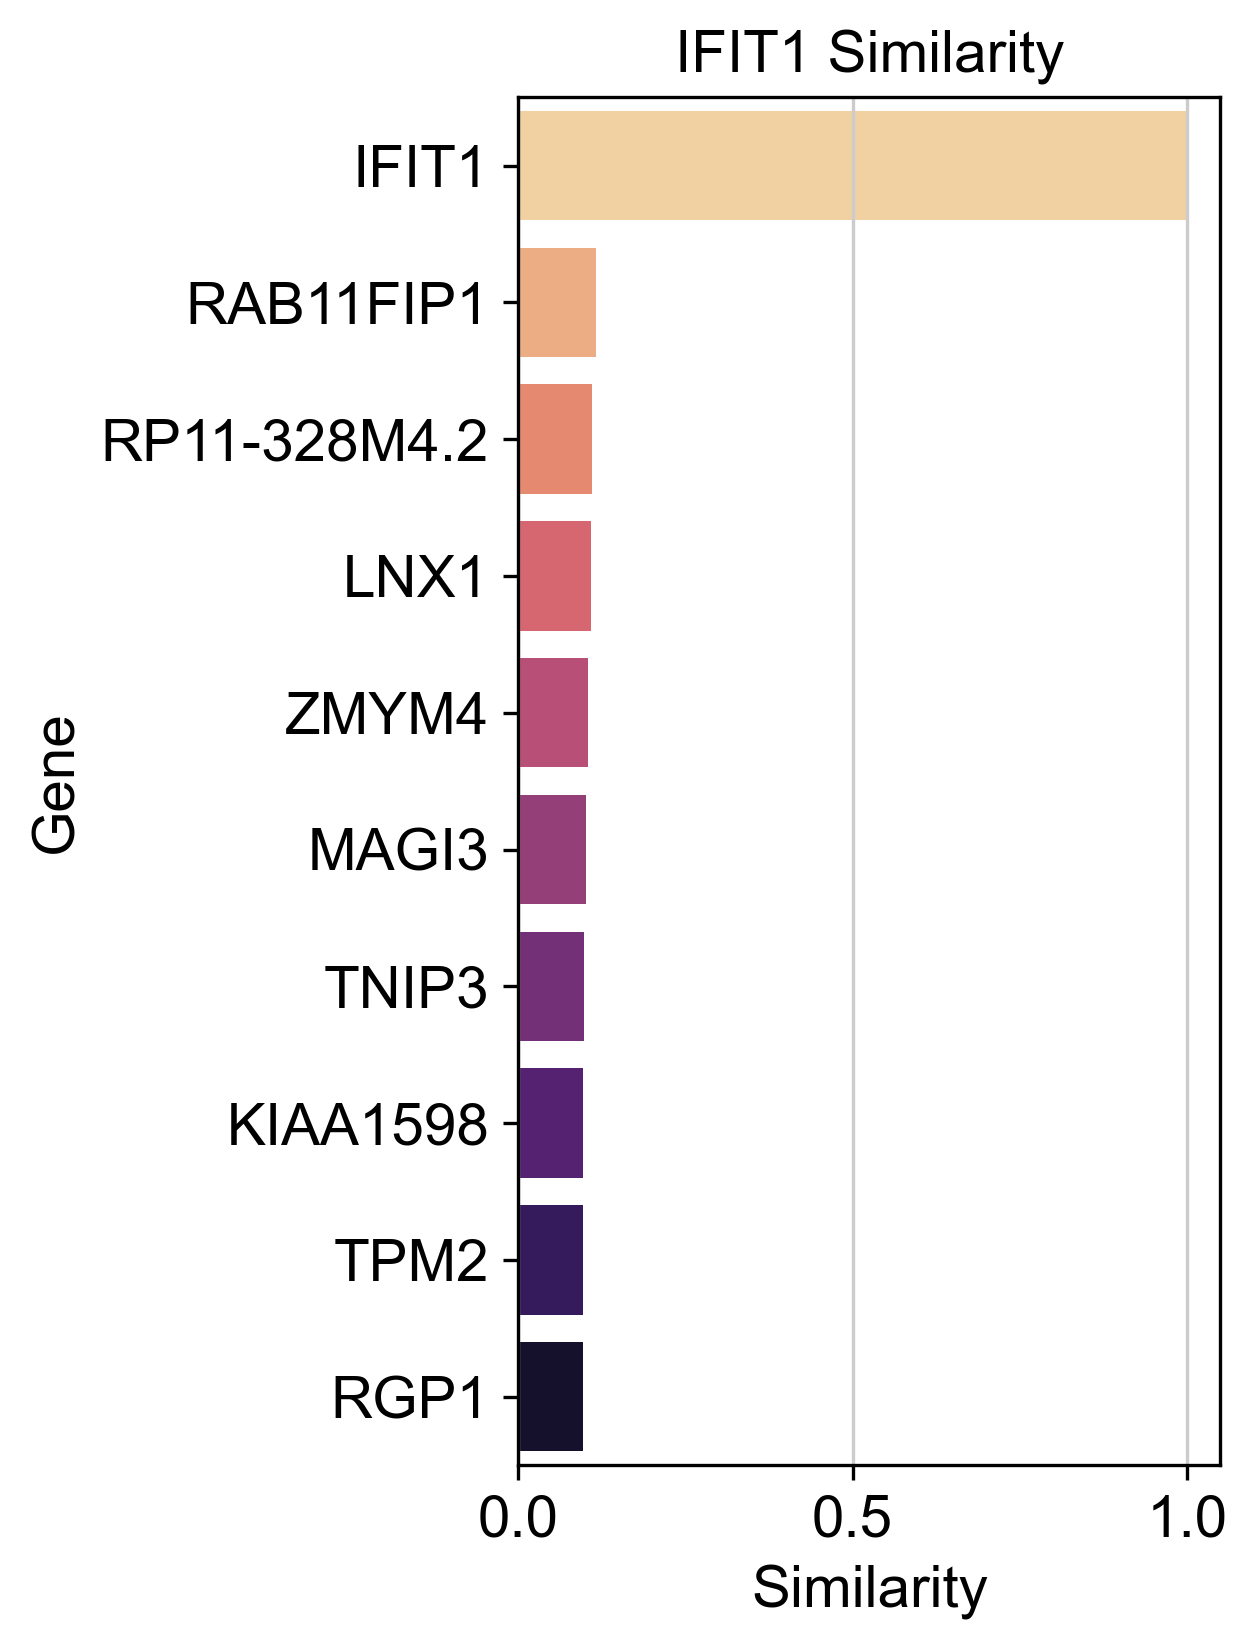

In [22]:
embed.plot_similarities("IFIT1")

# Build Cell Embedding

normalizing counts per cell
    finished (0:00:00)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1051348/1051348 [00:01<00:00, 592615.16it/s]


Generating Cell Vectors.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14039/14039 [00:00<00:00, 25661.79it/s]

Found 0 Cells with No Counts.
Finished.
Loading embedding in X_genevector.
Running Scanpy neighbors and umap.
computing neighbors


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/cegli

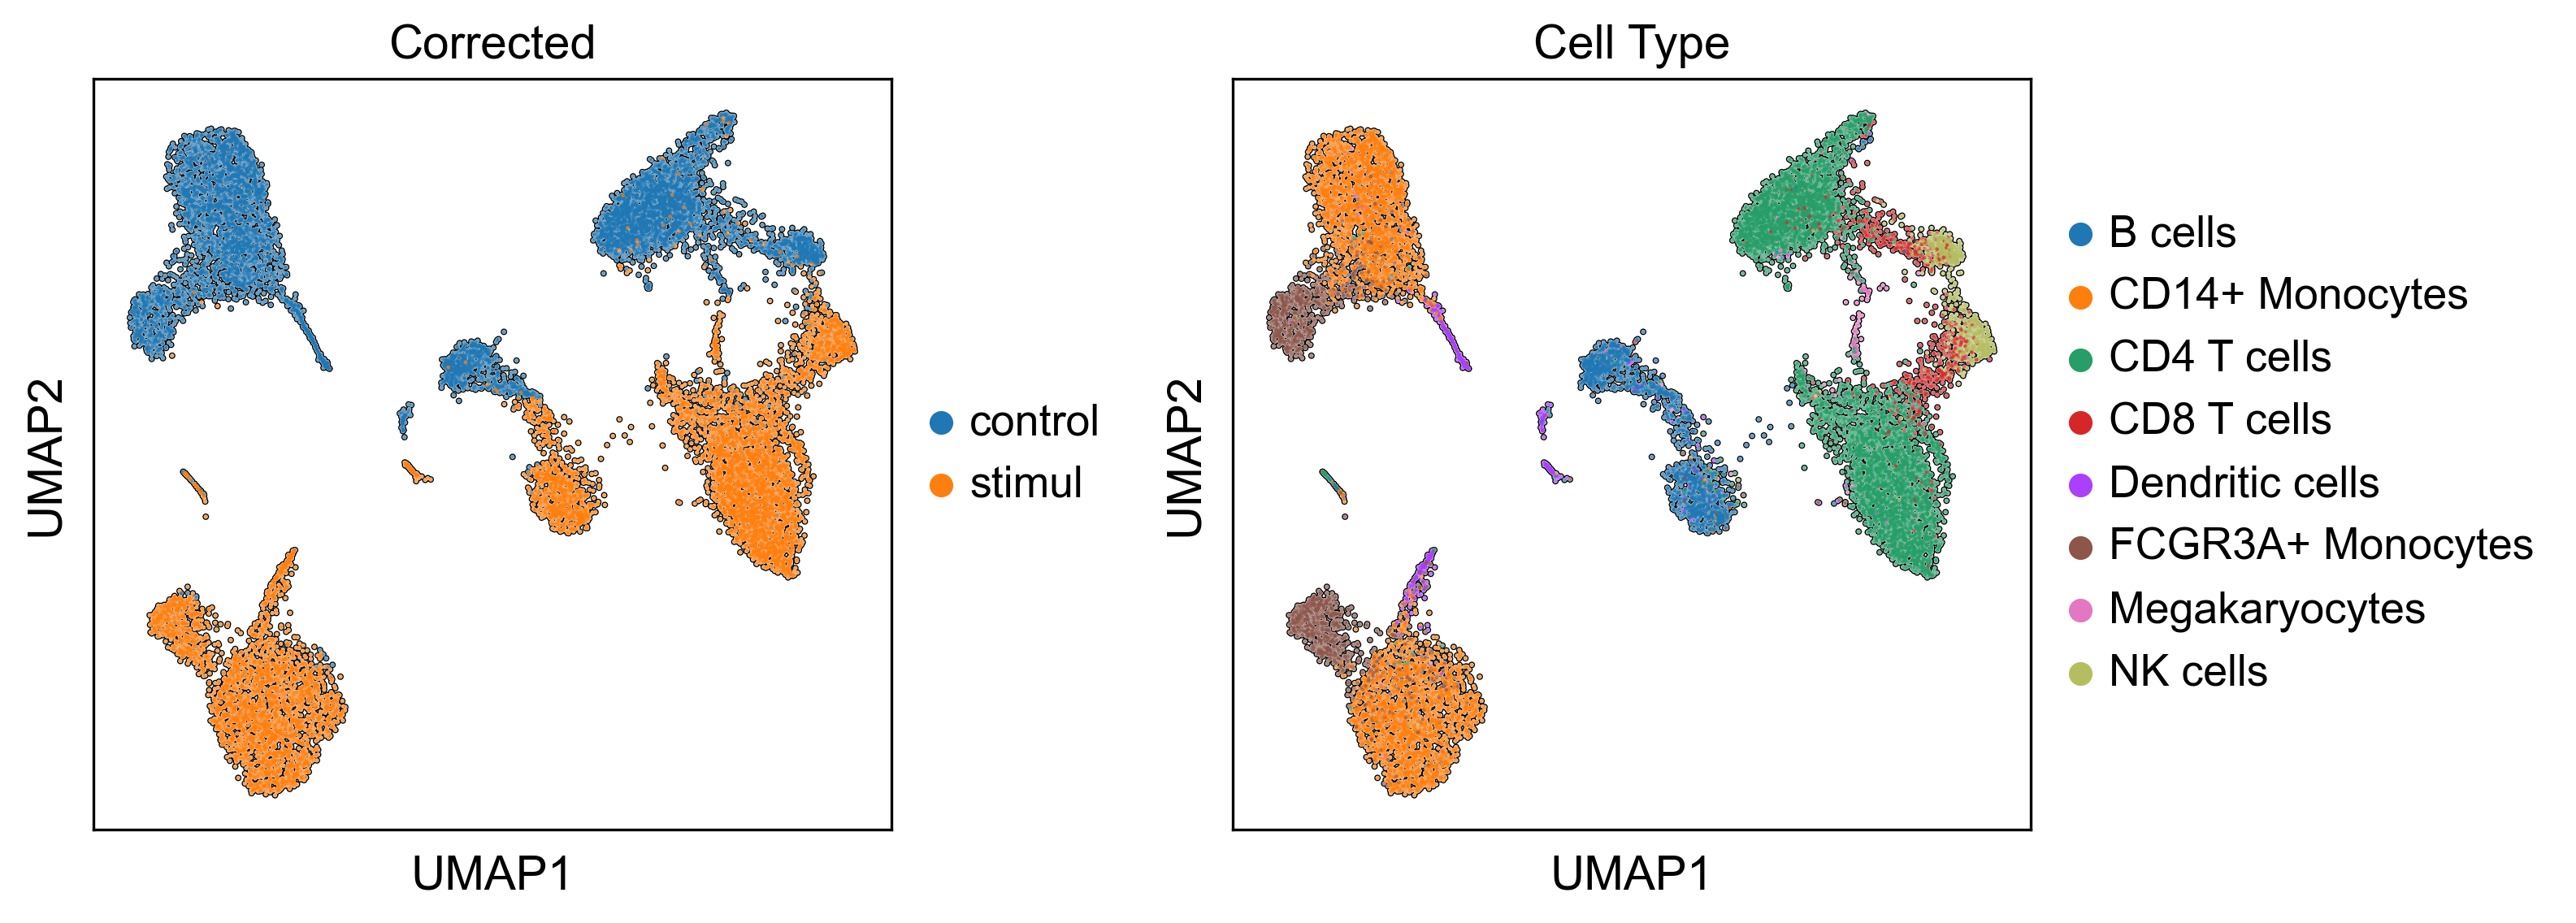

In [ ]:
cembed = CellEmbedding(dataset, embed)
adata = cembed.get_adata()
sc.pl.umap(adata,color=["sample","celltype"], wspace=0.3,
                 title=["Corrected","Cell Type"],add_outline=True,size=5)

# Apply Batch Correction

Generating batch vectors.
Computing correction vector for stimul.
Applying correction vectors.
Loading embedding in X_genevector.
Running Scanpy neighbors and umap.
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/cegli

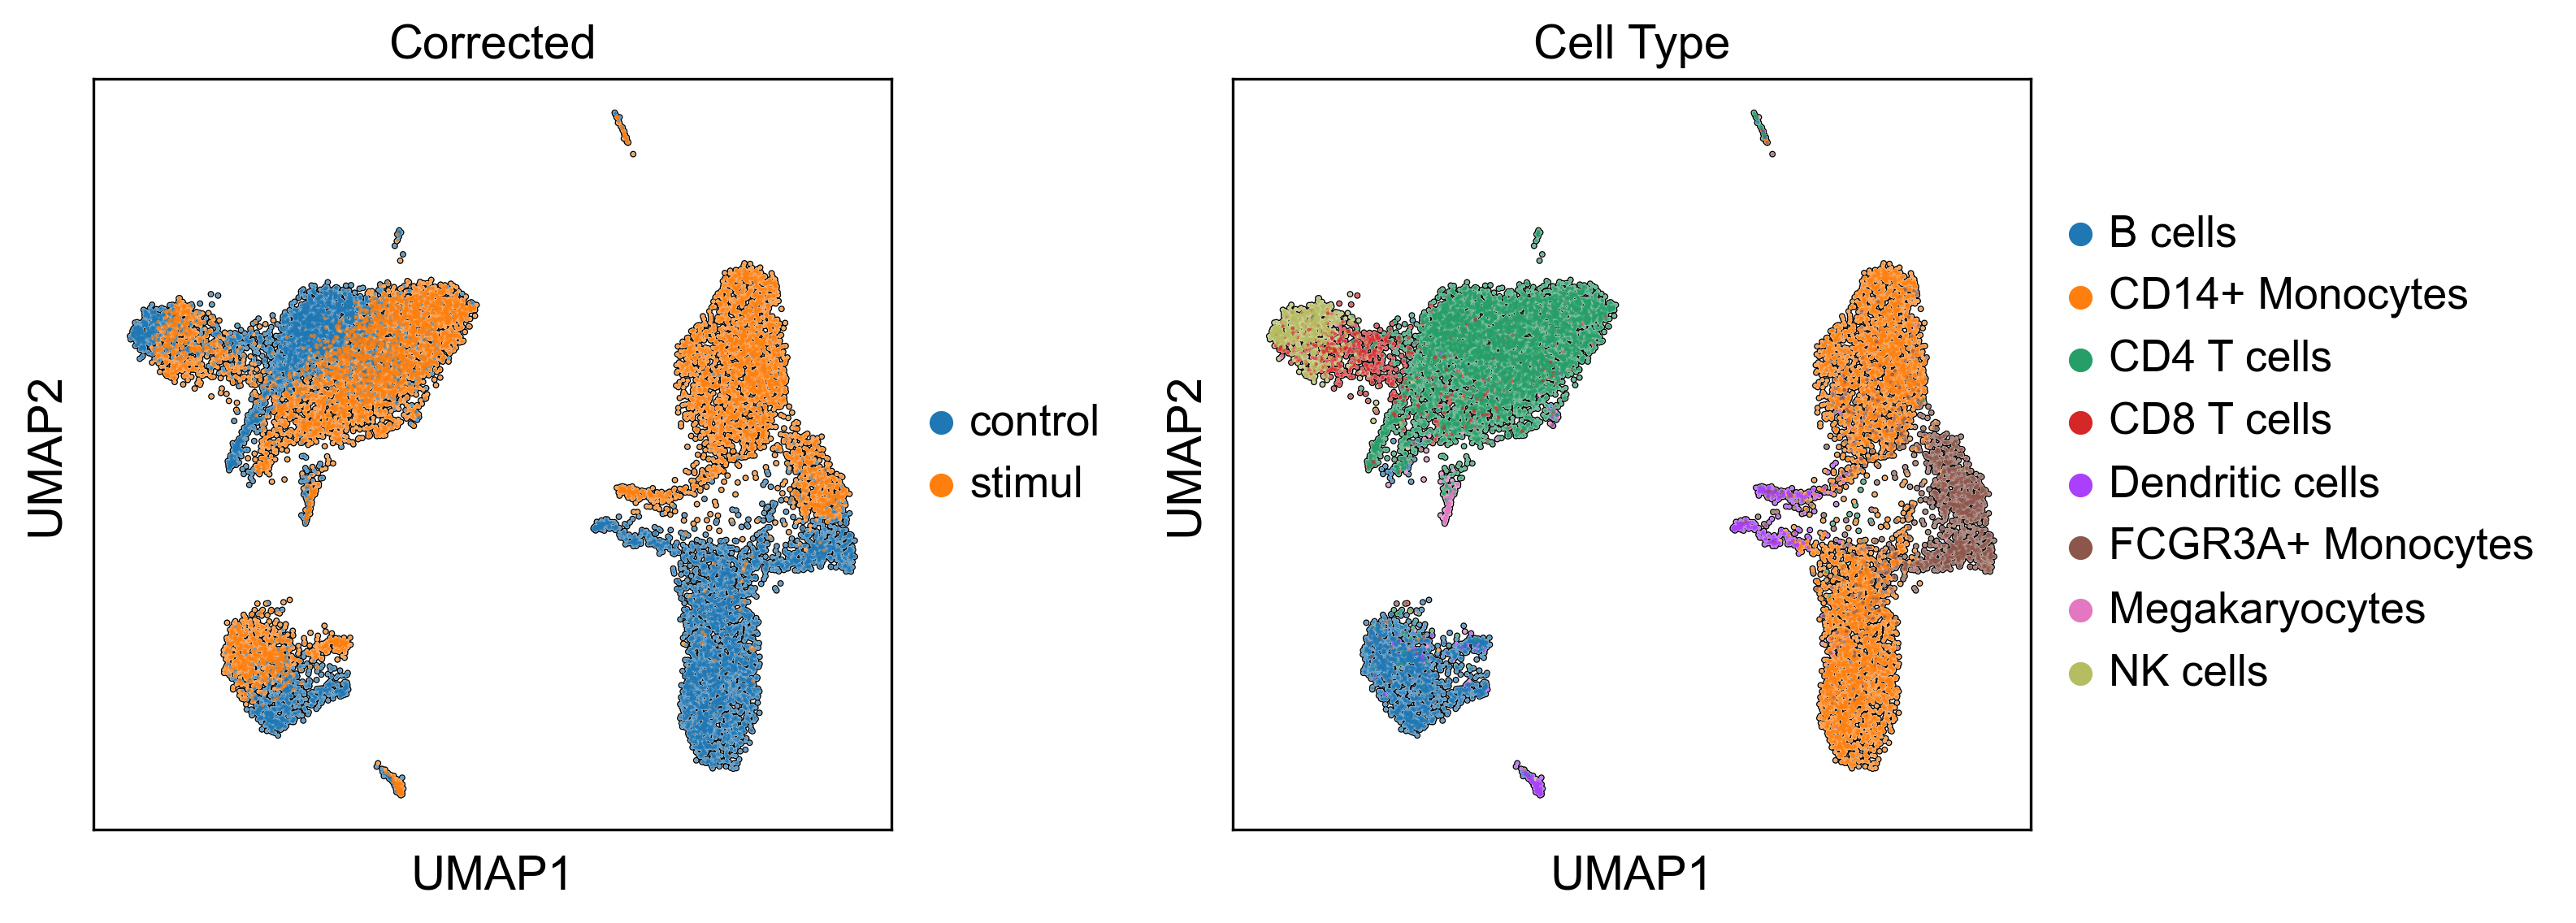

In [8]:
cembed.batch_correct(column="sample",reference="control")
adata = cembed.get_adata()
sc.pl.umap(adata,color=["sample","celltype"], wspace=0.3,
                                 title=["Corrected","Cell Type"],add_outline=True,size=5, save="pbmc.pdf")



# Generate Metagenes

In [9]:
gdata = embed.get_adata(resolution=40)
metagenes = embed.get_metagenes(gdata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 308 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


# Find ISG Metagene

In [10]:
for mg, genes in metagenes.items():
    if "IFIT1" in genes:
        print(mg, genes)
        isg_metagene = mg

1 ['ISG15', 'RSAD2', 'TNFSF10', 'LY6E', 'IFIT2', 'IFIT3', 'IFIT1', 'IFITM3', 'OAS1', 'ISG20', 'MX1']


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/Users/ceglian/gvenv/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


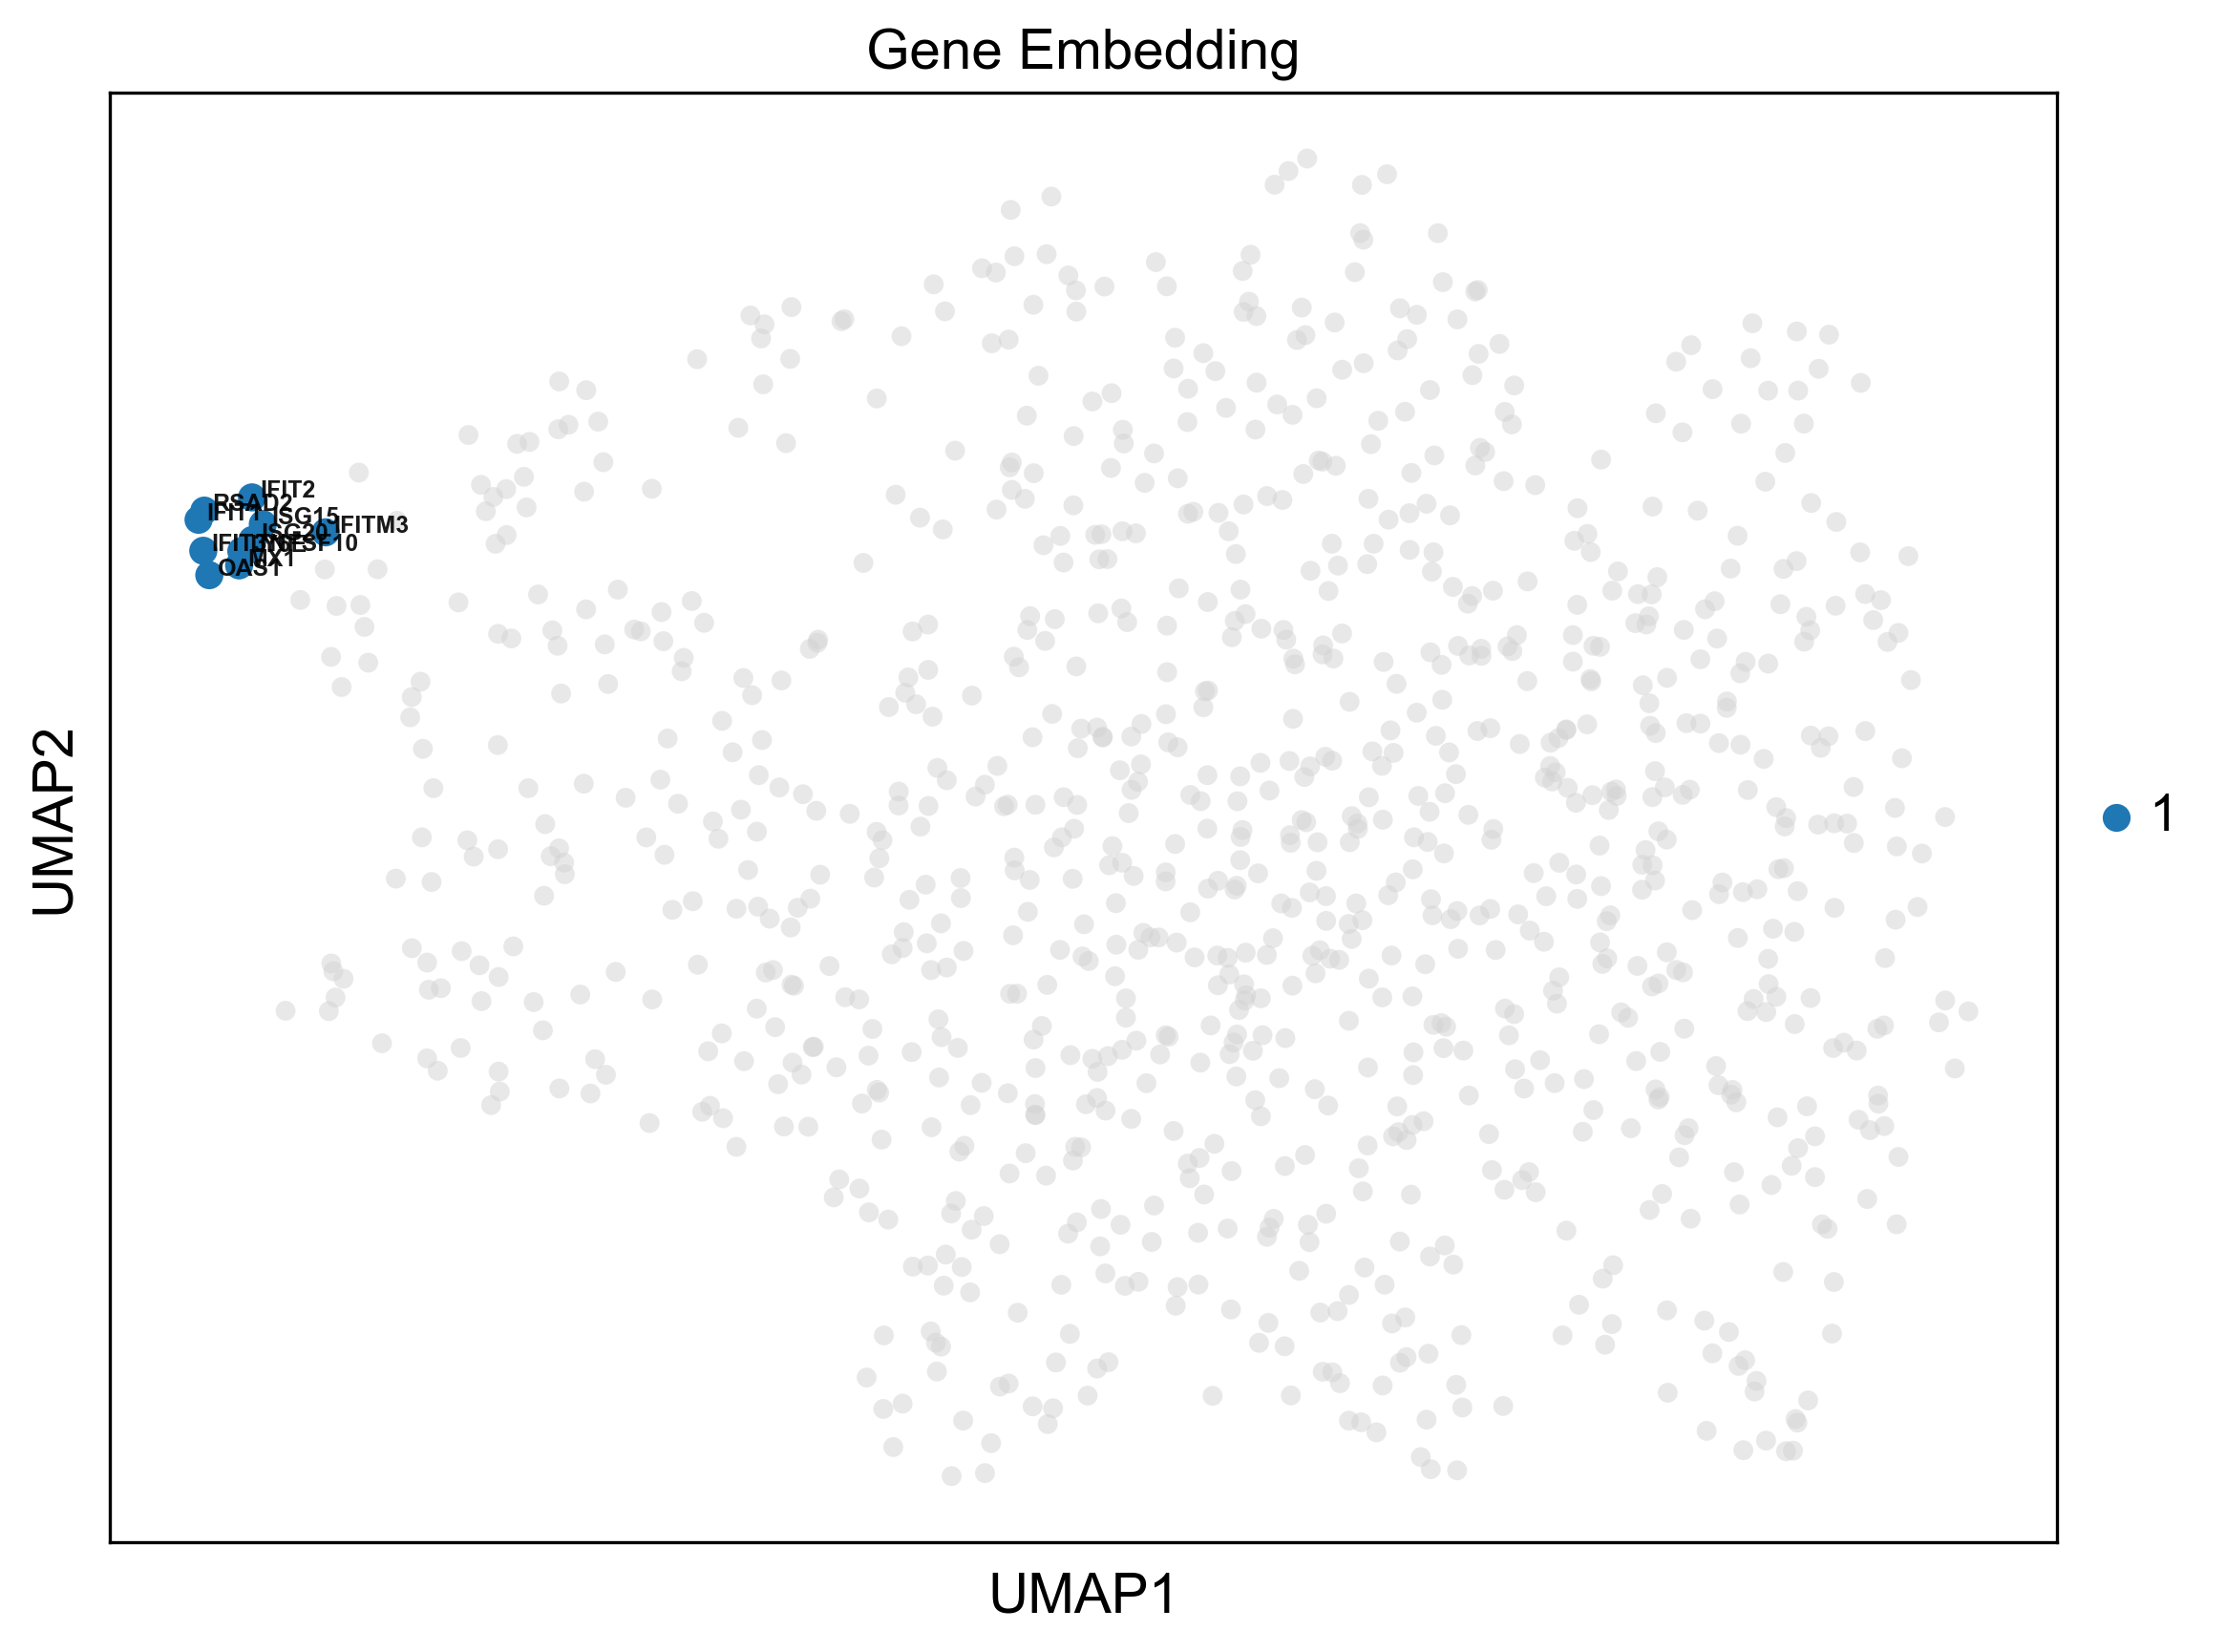

In [11]:
embed.plot_metagene(gdata, mg=isg_metagene)

In [12]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
embed.score_metagenes(adata, metagenes)

normalizing counts per cell
    finished (0:00:00)
computing score '68_SCORE'
    finished: added
    '68_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '1_SCORE'
    finished: added
    '1_SCORE', score of gene set (adata.obs).
    66 total control genes are used. (0:00:00)
computing score '94_SCORE'
    finished: added
    '94_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '39_SCORE'
    finished: added
    '39_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '83_SCORE'
    finished: added
    '83_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '41_SCORE'
    finished: added
    '41_SCORE', score of gene set (adata.obs).
    205 total control genes are used. (0:00:00)
computing score '74_SCORE'
    finished: added
    '74_SCORE', score of gene set (adata.obs).
    16

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib

    finished: added
    '92_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '139_SCORE'
    finished: added
    '139_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '151_SCORE'
    finished: added
    '151_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '15_SCORE'
    finished: added
    '15_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '22_SCORE'
    finished: added
    '22_SCORE', score of gene set (adata.obs).
    204 total control genes are used. (0:00:00)
computing score '0_SCORE'
    finished: added
    '0_SCORE', score of gene set (adata.obs).
    322 total control genes are used. (0:00:00)
computing score '49_SCORE'
    finished: added
    '49_SCORE', score of gene set (adata.obs).
    205 total control genes are used. (0:00:00)
computing score '160_SCORE'
   

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib

    finished: added
    '234_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '108_SCORE'
    finished: added
    '108_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '109_SCORE'
    finished: added
    '109_SCORE', score of gene set (adata.obs).
    81 total control genes are used. (0:00:00)
computing score '4_SCORE'
    finished: added
    '4_SCORE', score of gene set (adata.obs).
    201 total control genes are used. (0:00:00)
computing score '203_SCORE'
    finished: added
    '203_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '9_SCORE'
    finished: added
    '9_SCORE', score of gene set (adata.obs).
    286 total control genes are used. (0:00:00)
computing score '106_SCORE'
    finished: added
    '106_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '190_SCORE'
   

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib

computing score '169_SCORE'
    finished: added
    '169_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '56_SCORE'
    finished: added
    '56_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '59_SCORE'
    finished: added
    '59_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '70_SCORE'
    finished: added
    '70_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '110_SCORE'
    finished: added
    '110_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '221_SCORE'
    finished: added
    '221_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '158_SCORE'
    finished: added
    '158_SCORE', score of gene set (adata.obs).
    81 total control genes are used. (0:00:00)


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib

    finished: added
    '242_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '264_SCORE'
    finished: added
    '264_SCORE', score of gene set (adata.obs).
    40 total control genes are used. (0:00:00)
computing score '216_SCORE'
    finished: added
    '216_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '126_SCORE'
    finished: added
    '126_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '63_SCORE'
    finished: added
    '63_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '171_SCORE'
    finished: added
    '171_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '201_SCORE'
    finished: added
    '201_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '99_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib

    finished: added
    '251_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '152_SCORE'
    finished: added
    '152_SCORE', score of gene set (adata.obs).
    39 total control genes are used. (0:00:00)
computing score '98_SCORE'
    finished: added
    '98_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '35_SCORE'
    finished: added
    '35_SCORE', score of gene set (adata.obs).
    162 total control genes are used. (0:00:00)
computing score '69_SCORE'
    finished: added
    '69_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '53_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib

    finished: added
    '53_SCORE', score of gene set (adata.obs).
    80 total control genes are used. (0:00:00)
computing score '11_SCORE'
    finished: added
    '11_SCORE', score of gene set (adata.obs).
    154 total control genes are used. (0:00:00)
computing score '118_SCORE'
    finished: added
    '118_SCORE', score of gene set (adata.obs).
    81 total control genes are used. (0:00:00)
computing score '7_SCORE'
    finished: added
    '7_SCORE', score of gene set (adata.obs).
    111 total control genes are used. (0:00:00)
computing score '48_SCORE'
    finished: added
    '48_SCORE', score of gene set (adata.obs).
    205 total control genes are used. (0:00:00)
computing score '67_SCORE'
    finished: added
    '67_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '25_SCORE'
    finished: added
    '25_SCORE', score of gene set (adata.obs).
    162 total control genes are used. (0:00:00)
computing score '202_SCORE'
    fin

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib

    finished: added
    '24_SCORE', score of gene set (adata.obs).
    155 total control genes are used. (0:00:00)
computing score '167_SCORE'
    finished: added
    '167_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '189_SCORE'
    finished: added
    '189_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '85_SCORE'
    finished: added
    '85_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '52_SCORE'
    finished: added
    '52_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '113_SCORE'
    finished: added
    '113_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '245_SCORE'
    finished: added
    '245_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '30_SCORE'

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib

computing score '137_SCORE'
    finished: added
    '137_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '79_SCORE'
    finished: added
    '79_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '176_SCORE'
    finished: added
    '176_SCORE', score of gene set (adata.obs).
    40 total control genes are used. (0:00:00)
computing score '115_SCORE'
    finished: added
    '115_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '134_SCORE'
    finished: added
    '134_SCORE', score of gene set (adata.obs).
    81 total control genes are used. (0:00:00)
computing score '255_SCORE'
    finished: added
    '255_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '194_SCORE'
    finished: added
    '194_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib

    finished: added
    '42_SCORE', score of gene set (adata.obs).
    162 total control genes are used. (0:00:00)
computing score '204_SCORE'
    finished: added
    '204_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '19_SCORE'
    finished: added
    '19_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '116_SCORE'
    finished: added
    '116_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '144_SCORE'
    finished: added
    '144_SCORE', score of gene set (adata.obs).
    81 total control genes are used. (0:00:00)
computing score '267_SCORE'
    finished: added
    '267_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '159_SCORE'
    finished: added
    '159_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '173_SCORE

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '65_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '27_SCORE'
    finished: added
    '27_SCORE', score of gene set (adata.obs).
    162 total control genes are used. (0:00:00)
computing score '17_SCORE'
    finished: added
    '17_SCORE', score of gene set (adata.obs).
    203 total control genes are used. (0:00:00)
computing score '117_SCORE'
    finished: added
    '117_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '101_SCORE'
    finished: added
    '101_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '141_SCORE'
    finished: added
    '141_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '47_SCORE'
    finished: added
    '47_SCORE', score of gene set (adata.obs).
    121 total control genes are used. (0:00:00)
computing score '64_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is

    finished: added
    '164_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '210_SCORE'
    finished: added
    '210_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '135_SCORE'
    finished: added
    '135_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '82_SCORE'
    finished: added
    '82_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '143_SCORE'
    finished: added
    '143_SCORE', score of gene set (adata.obs).
    80 total control genes are used. (0:00:00)
computing score '2_SCORE'
    finished: added
    '2_SCORE', score of gene set (adata.obs).
    242 total control genes are used. (0:00:00)
computing score '44_SCORE'
    finished: added
    '44_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '3_SCORE'
    

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '209_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '88_SCORE'
    finished: added
    '88_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '168_SCORE'
    finished: added
    '168_SCORE', score of gene set (adata.obs).
    81 total control genes are used. (0:00:00)
computing score '87_SCORE'
    finished: added
    '87_SCORE', score of gene set (adata.obs).
    79 total control genes are used. (0:00:00)
computing score '262_SCORE'
    finished: added
    '262_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '121_SCORE'
    finished: added
    '121_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '73_SCORE'
    finished: added
    '73_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '16_SCORE'
   

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '146_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '272_SCORE'
    finished: added
    '272_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '127_SCORE'
    finished: added
    '127_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '162_SCORE'
    finished: added
    '162_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '104_SCORE'
    finished: added
    '104_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '218_SCORE'
    finished: added
    '218_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '211_SCORE'
    finished: added
    '211_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '18_SCOR

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '196_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '253_SCORE'
    finished: added
    '253_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '58_SCORE'
    finished: added
    '58_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '131_SCORE'
    finished: added
    '131_SCORE', score of gene set (adata.obs).
    81 total control genes are used. (0:00:00)
computing score '274_SCORE'
    finished: added
    '274_SCORE', score of gene set (adata.obs).
    40 total control genes are used. (0:00:00)
computing score '193_SCORE'
    finished: added
    '193_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '122_SCORE'
    finished: added
    '122_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '37_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is

    finished: added
    '124_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '90_SCORE'
    finished: added
    '90_SCORE', score of gene set (adata.obs).
    79 total control genes are used. (0:00:00)
computing score '240_SCORE'
    finished: added
    '240_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '275_SCORE'
    finished: added
    '275_SCORE', score of gene set (adata.obs).
    40 total control genes are used. (0:00:00)
computing score '20_SCORE'
    finished: added
    '20_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '89_SCORE'
    finished: added
    '89_SCORE', score of gene set (adata.obs).
    80 total control genes are used. (0:00:00)
computing score '125_SCORE'
    finished: added
    '125_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '38_SCORE'
   

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '84_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '51_SCORE'
    finished: added
    '51_SCORE', score of gene set (adata.obs).
    205 total control genes are used. (0:00:00)
computing score '57_SCORE'
    finished: added
    '57_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '6_SCORE'
    finished: added
    '6_SCORE', score of gene set (adata.obs).
    369 total control genes are used. (0:00:00)
computing score '129_SCORE'
    finished: added
    '129_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '60_SCORE'
    finished: added
    '60_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '91_SCORE'
    finished: added
    '91_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '276_SCORE'
    f

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '277_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '278_SCORE'
    finished: added
    '278_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '145_SCORE'
    finished: added
    '145_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '50_SCORE'
    finished: added
    '50_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '214_SCORE'
    finished: added
    '214_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '132_SCORE'
    finished: added
    '132_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '250_SCORE'
    finished: added
    '250_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '269_SCORE

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '215_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '188_SCORE'
    finished: added
    '188_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '161_SCORE'
    finished: added
    '161_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '10_SCORE'
    finished: added
    '10_SCORE', score of gene set (adata.obs).
    111 total control genes are used. (0:00:00)
computing score '157_SCORE'
    finished: added
    '157_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '280_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '280_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '217_SCORE'
    finished: added
    '217_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '281_SCORE'
    finished: added
    '281_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '220_SCORE'
    finished: added
    '220_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '180_SCORE'
    finished: added
    '180_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '40_SCORE'
    finished: added
    '40_SCORE', score of gene set (adata.obs).
    163 total control genes are used. (0:00:00)
computing score '219_SCORE'
    finished: added
    '219_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '45_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '96_SCORE', score of gene set (adata.obs).
    157 total control genes are used. (0:00:00)
computing score '23_SCORE'
    finished: added
    '23_SCORE', score of gene set (adata.obs).
    162 total control genes are used. (0:00:00)
computing score '138_SCORE'
    finished: added
    '138_SCORE', score of gene set (adata.obs).
    116 total control genes are used. (0:00:00)
computing score '195_SCORE'
    finished: added
    '195_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '103_SCORE'
    finished: added
    '103_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '252_SCORE'
    finished: added
    '252_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '172_SCORE'
    finished: added
    '172_SCORE', score of gene set (adata.obs).
    81 total control genes are used. (0:00:00)
computing score '307_SCORE

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '284_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '229_SCORE'
    finished: added
    '229_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '237_SCORE'
    finished: added
    '237_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '222_SCORE'
    finished: added
    '222_SCORE', score of gene set (adata.obs).
    39 total control genes are used. (0:00:00)
computing score '207_SCORE'
    finished: added
    '207_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '183_SCORE'
    finished: added
    '183_SCORE', score of gene set (adata.obs).
    81 total control genes are used. (0:00:00)
computing score '271_SCORE'
    finished: added
    '271_SCORE', score of gene set (adata.obs).
    34 total control genes are used. (0:00:00)
computing score '200_SCORE'

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is

    finished: added
    '142_SCORE', score of gene set (adata.obs).
    81 total control genes are used. (0:00:00)
computing score '258_SCORE'
    finished: added
    '258_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '136_SCORE'
    finished: added
    '136_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '33_SCORE'
    finished: added
    '33_SCORE', score of gene set (adata.obs).
    205 total control genes are used. (0:00:00)
computing score '140_SCORE'
    finished: added
    '140_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '225_SCORE'
    finished: added
    '225_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '55_SCORE'
    finished: added
    '55_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '154_SCORE'

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is

    finished: added
    '286_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '75_SCORE'
    finished: added
    '75_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '285_SCORE'
    finished: added
    '285_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '54_SCORE'
    finished: added
    '54_SCORE', score of gene set (adata.obs).
    115 total control genes are used. (0:00:00)
computing score '150_SCORE'
    finished: added
    '150_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '72_SCORE'
    finished: added
    '72_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '230_SCORE'
    finished: added
    '230_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '231_SCORE'
 

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '223_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '192_SCORE'
    finished: added
    '192_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '178_SCORE'
    finished: added
    '178_SCORE', score of gene set (adata.obs).
    81 total control genes are used. (0:00:00)
computing score '235_SCORE'
    finished: added
    '235_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '233_SCORE'
    finished: added
    '233_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '287_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '287_SCORE', score of gene set (adata.obs).
    40 total control genes are used. (0:00:00)
computing score '288_SCORE'
    finished: added
    '288_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '205_SCORE'
    finished: added
    '205_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '289_SCORE'
    finished: added
    '289_SCORE', score of gene set (adata.obs).
    40 total control genes are used. (0:00:00)
computing score '166_SCORE'
    finished: added
    '166_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '257_SCORE'
    finished: added
    '257_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '174_SCORE'
    finished: added
    '174_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '232_SCOR

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '165_SCORE', score of gene set (adata.obs).
    81 total control genes are used. (0:00:00)
computing score '177_SCORE'
    finished: added
    '177_SCORE', score of gene set (adata.obs).
    40 total control genes are used. (0:00:00)
computing score '227_SCORE'
    finished: added
    '227_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '256_SCORE'
    finished: added
    '256_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '147_SCORE'
    finished: added
    '147_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '290_SCORE'
    finished: added
    '290_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '148_SCORE'
    finished: added
    '148_SCORE', score of gene set (adata.obs).
    39 total control genes are used. (0:00:00)
computing score '111_SCORE

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '66_SCORE', score of gene set (adata.obs).
    122 total control genes are used. (0:00:00)
computing score '261_SCORE'
    finished: added
    '261_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '149_SCORE'
    finished: added
    '149_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '292_SCORE'
    finished: added
    '292_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '293_SCORE'
    finished: added
    '293_SCORE', score of gene set (adata.obs).
    40 total control genes are used. (0:00:00)
computing score '297_SCORE'
    finished: added
    '297_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '236_SCORE'
    finished: added
    '236_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '102_SCORE

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '238_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '239_SCORE'
    finished: added
    '239_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '241_SCORE'
    finished: added
    '241_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '163_SCORE'
    finished: added
    '163_SCORE', score of gene set (adata.obs).
    40 total control genes are used. (0:00:00)
computing score '93_SCORE'
    finished: added
    '93_SCORE', score of gene set (adata.obs).
    164 total control genes are used. (0:00:00)
computing score '95_SCORE'
    finished: added
    '95_SCORE', score of gene set (adata.obs).
    121 total control genes are used. (0:00:00)
computing score '244_SCORE'
    finished: added
    '244_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '298_SCORE'
 

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '300_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '299_SCORE'
    finished: added
    '299_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '249_SCORE'
    finished: added
    '249_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '270_SCORE'
    finished: added
    '270_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '248_SCORE'
    finished: added
    '248_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '187_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '187_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '260_SCORE'
    finished: added
    '260_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '291_SCORE'
computing score '185_SCORE'
    finished: added
    '185_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '303_SCORE'
    finished: added
    '303_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '279_SCORE'
    finished: added
    '279_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '254_SCORE'
    finished: added
    '254_SCORE', score of gene set (adata.obs).
    82 total control genes are used. (0:00:00)
computing score '282_SCORE'
    finished: added
    '282_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:0

/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is

    finished: added
    '304_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '305_SCORE'
    finished: added
    '305_SCORE', score of gene set (adata.obs).
    40 total control genes are used. (0:00:00)
computing score '306_SCORE'
    finished: added
    '306_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)
computing score '184_SCORE'
    finished: added
    '184_SCORE', score of gene set (adata.obs).
    123 total control genes are used. (0:00:00)
computing score '296_SCORE'
    finished: added
    '296_SCORE', score of gene set (adata.obs).
    41 total control genes are used. (0:00:00)


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

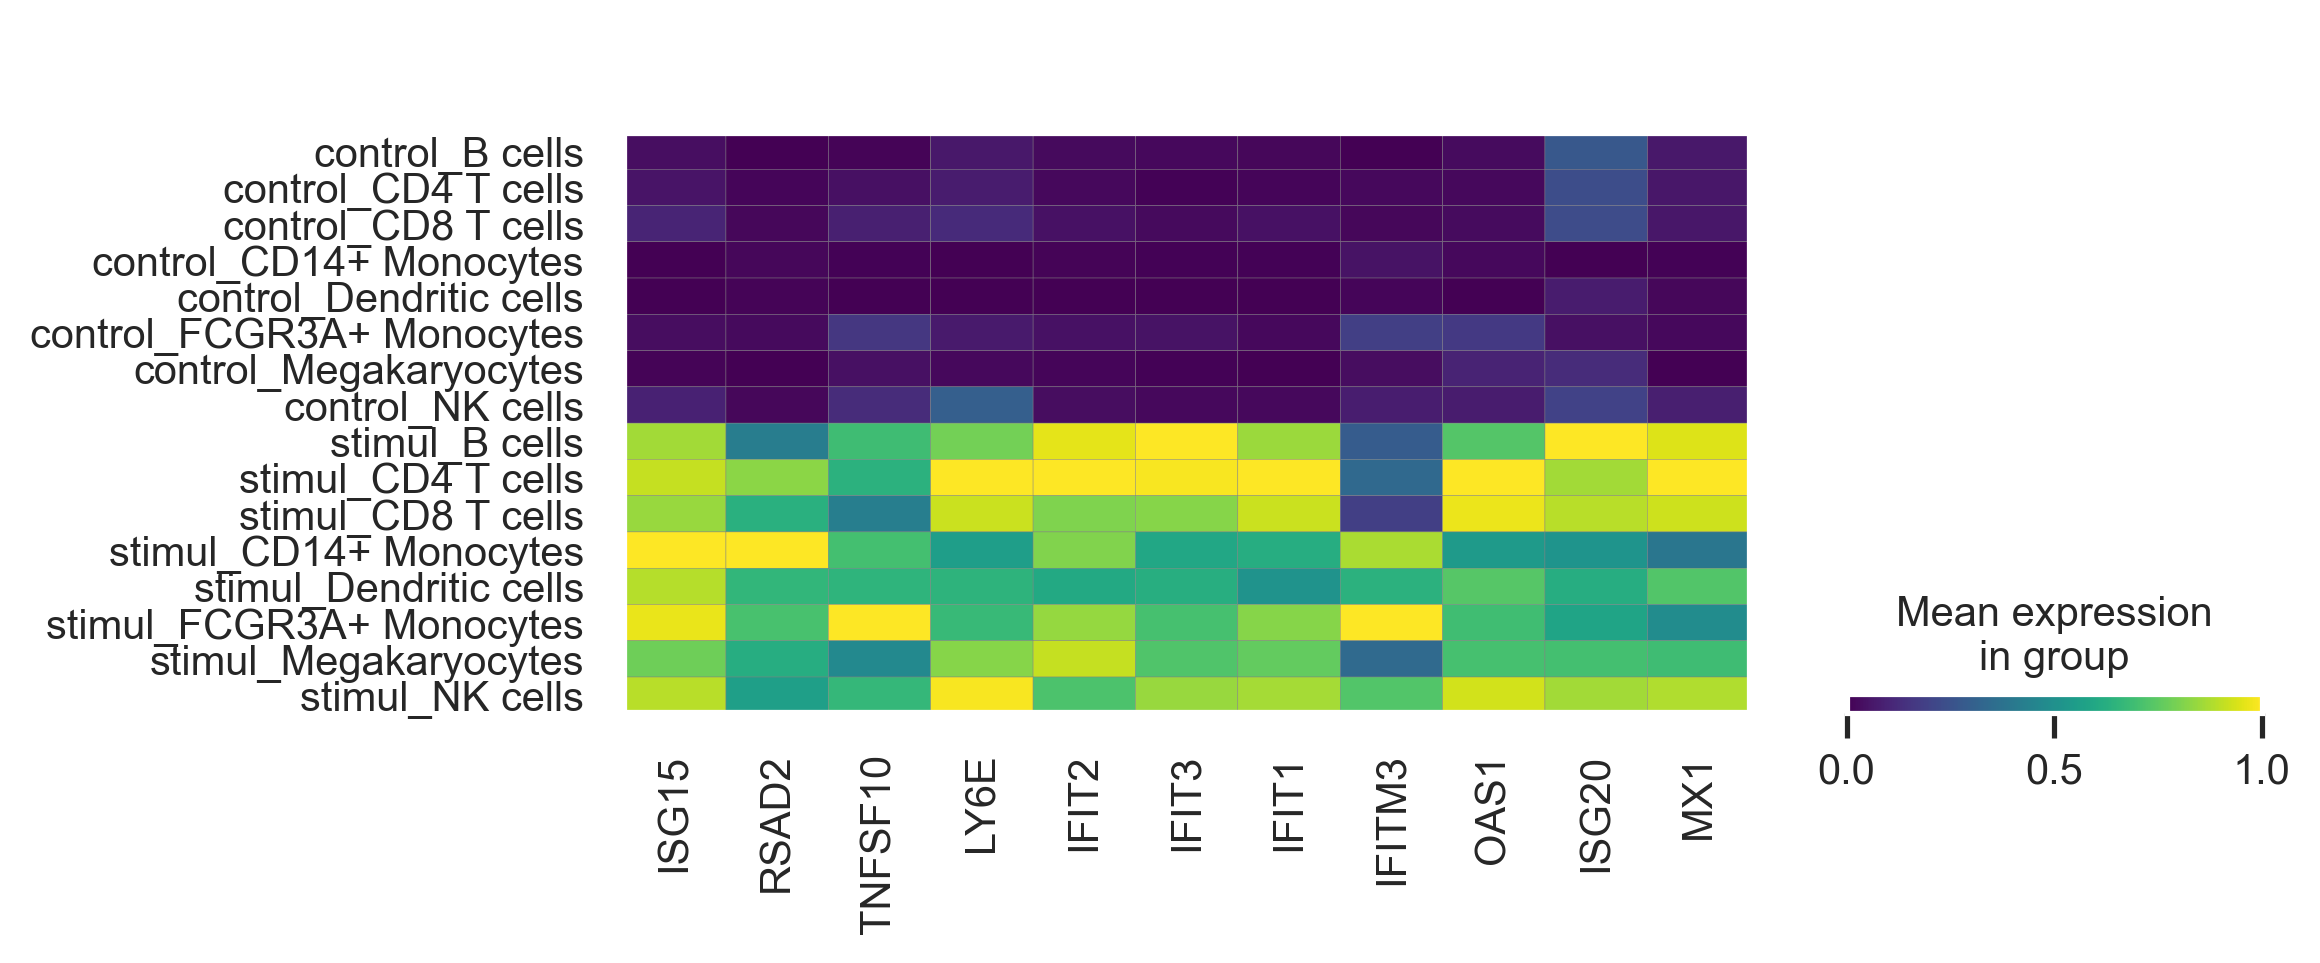

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.)
fig,ax = plt.subplots(1,1,figsize=(7,3))
sc.pl.matrixplot(adata,metagenes[isg_metagene],groupby="detailed_celltype",standard_scale="var",ax=ax)

# Plot All Metagenes

<Figure size 750x1950 with 0 Axes>

<Figure size 600x600 with 0 Axes>

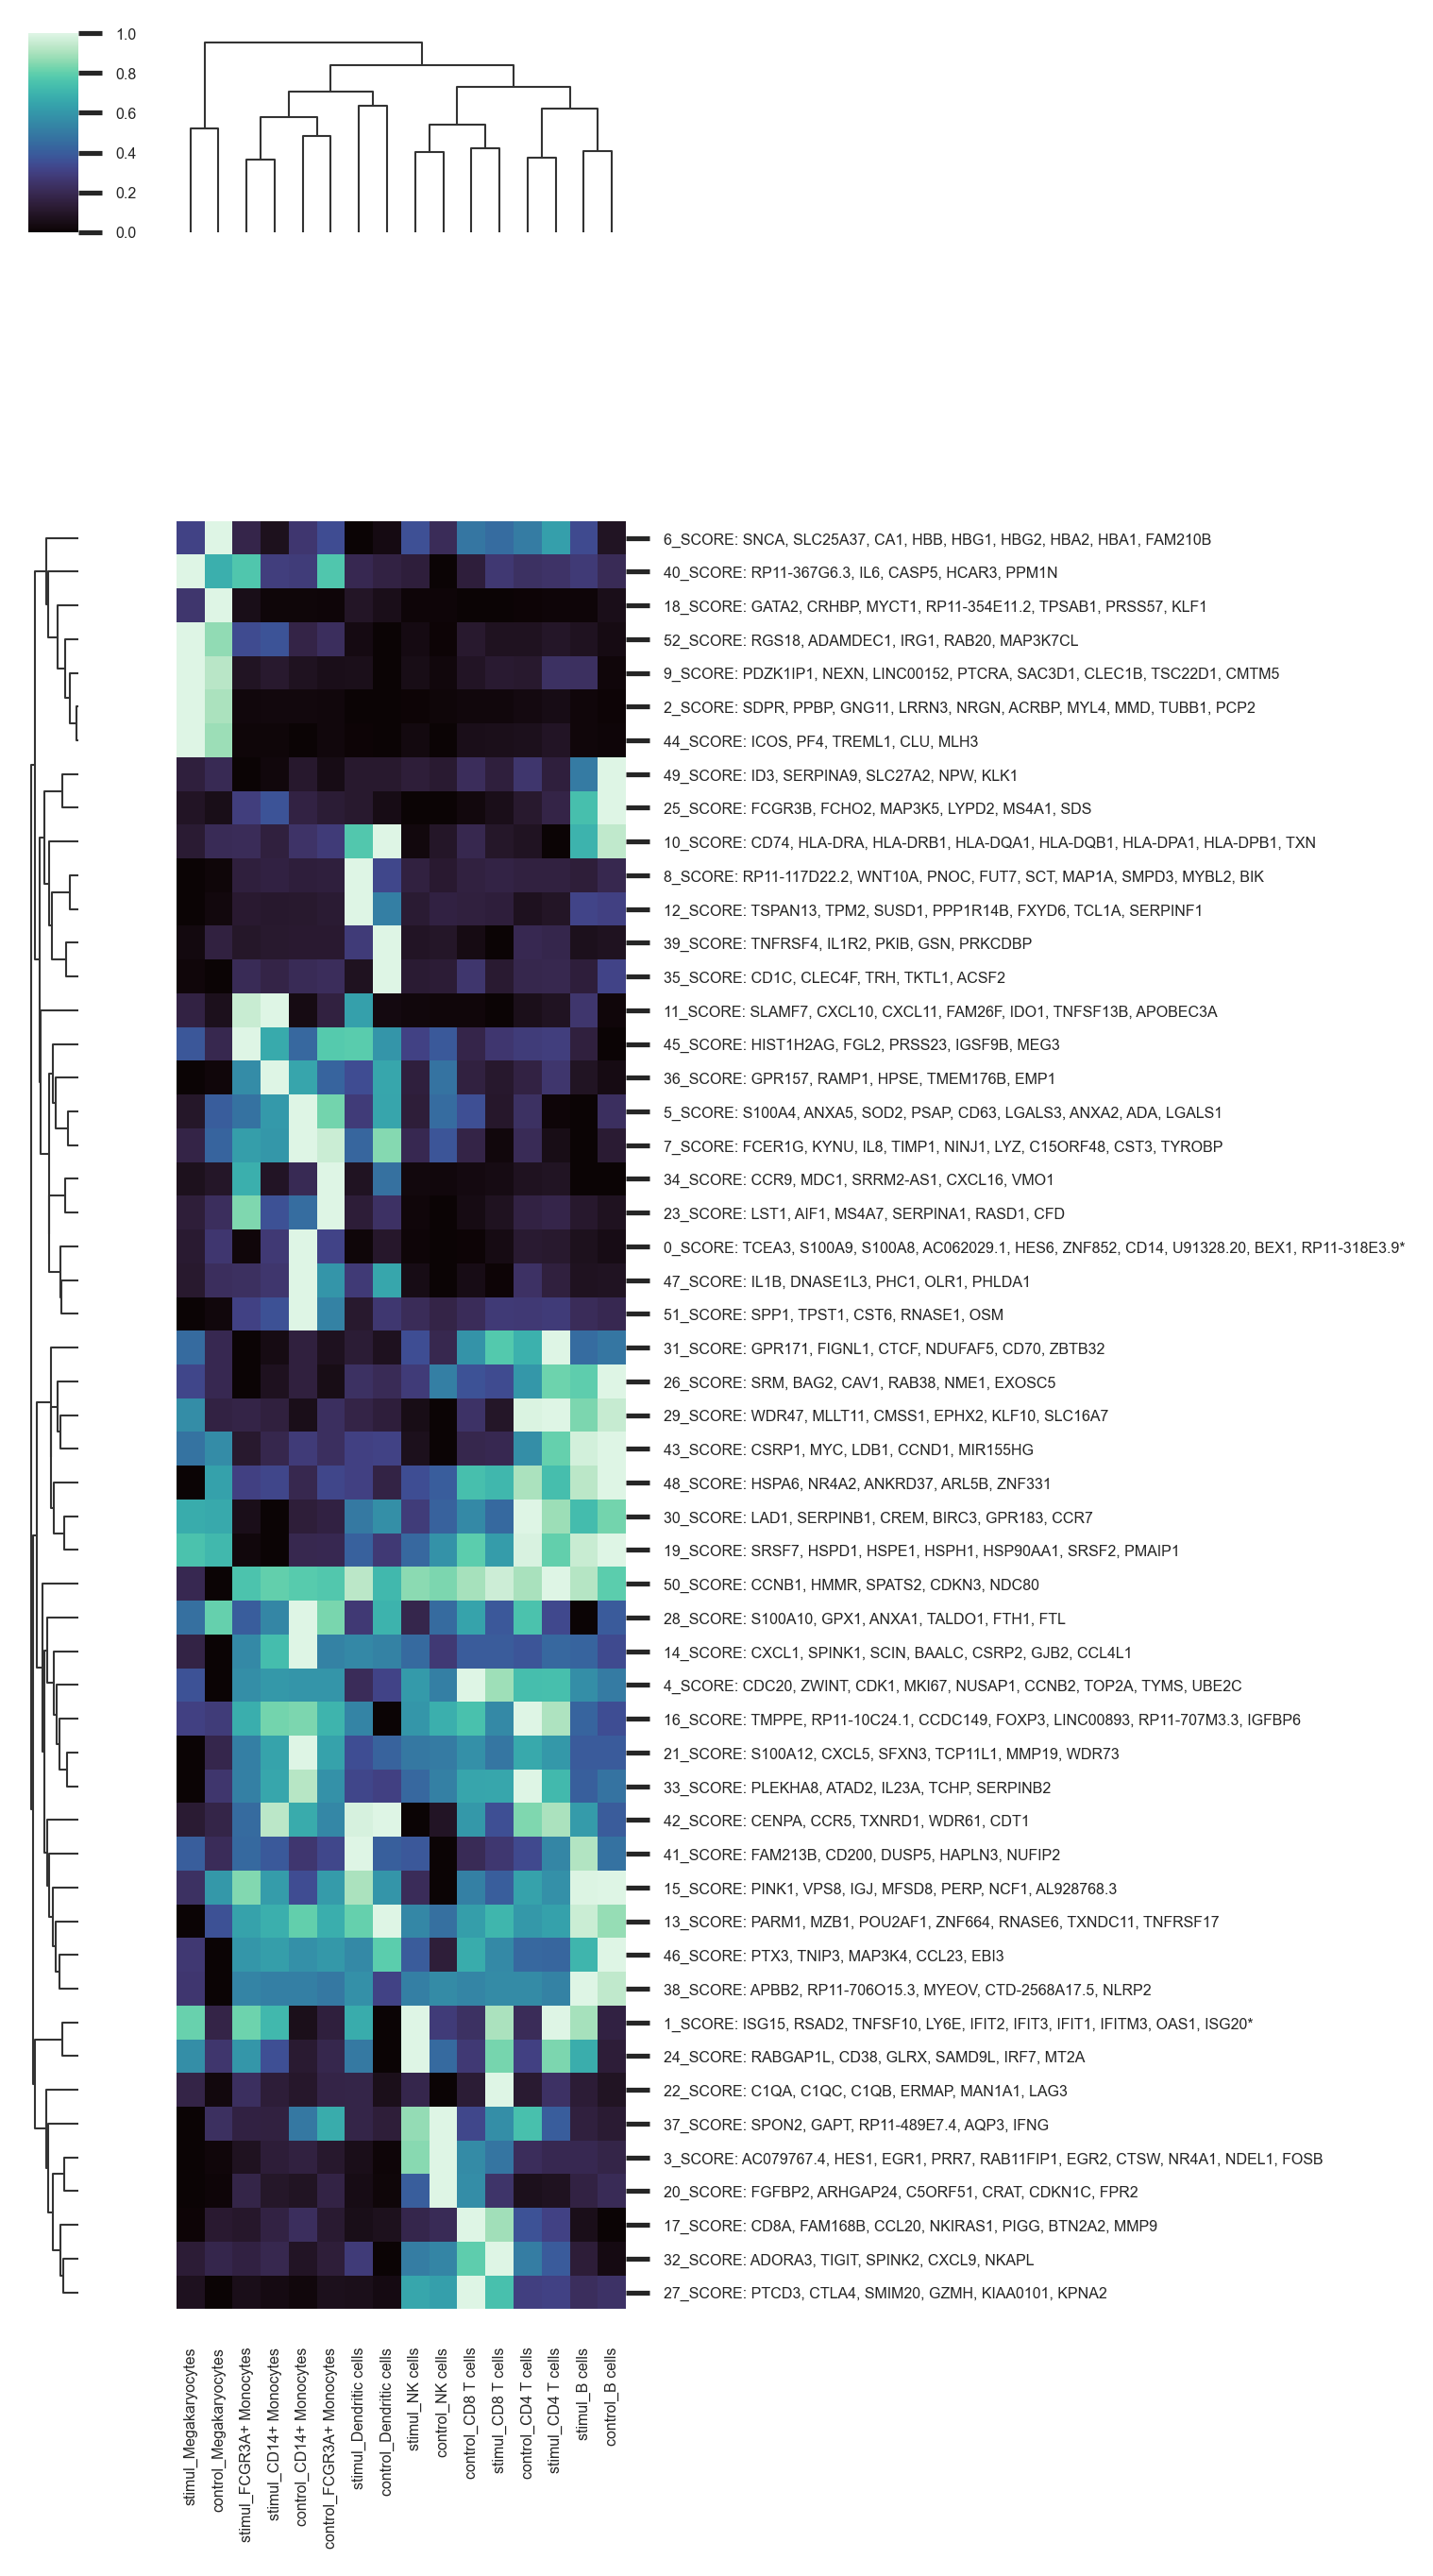

In [14]:
import numpy
mgs = dict()
for mg, genes in metagenes.items():
    if len(genes) > 4:
        mgs[mg] = genes

sns.set(font_scale=0.35)

embed.plot_metagenes_scores(adata,mgs,"detailed_celltype")